# Overview

Data Source:
- Use data from the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2): Crimes 2001 to Present, which includes type of crime, date/time, lat/long, District/ward, arrests, etc.

Helper Notebook:
- Use the helper notebook in this [repository](https://github.com/coding-dojo-data-science/preparing-chicago-crime-data) to process your manually-downloaded csv into several .csv.gz files

Supplemental Data:
- To answer some of the possible questions, you may need to perform some feature engineering, like adding holiday information from an API on this [Holiday Data](https://docs.google.com/spreadsheets/d/1d8hoZzDAhbWx6EwNjrMTTOE5-23Pr1VxJeUxVj1JL9U/edit?usp=sharing).

## Possible Questions to consider:
1) Comparing Police Districts:
 - Which district has the most crimes? Which has the least?
2) Crimes Across the Years:
  - Are the total number of crimes increasing or decreasing across the years?
  - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?
3) Comparing AM vs. PM Rush Hour:
  - Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
  - What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
  - Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
4) Comparing Months:
  - What months have the most crime? What months have the least?
  - Are there any individual crimes that do not follow this pattern? If so, which crimes?
5) Comparing Holidays:
  - Are there any holidays that show an increase in the # of crimes?
  - Are there any holidays that show a decrease in the # of crimes?

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates

import warnings
warnings.filterwarnings('ignore')

# Functions

In [2]:
# import data into variables
def import_files():
    """Reads in .csv files from Data folder and names them
    dynamically with appropriate year"""
    
    
    file_name_template = "Chicago-Crime_{}"
    years = range(2001, 2024)
    
    # initialize dictionary to save files to
    data = {}
    
    # iterate through years
    for year in years:
        
        # recreate the file name
        file_name = file_name_template.format(year)
        
        # save file path based on file name
        file_path = f"Data/{file_name}.csv"
        
        # import as df
        df = pd.read_csv(file_path)
        
        # store in dictionary
        data[file_name] = df
        
        # replace dash (not allowed in python variable
        # names) with underscore
        # initialize new dictionary
        new_data = {}
            
        # loop through dict items
        for key, value in data.items():
            
            # if dash in key
            if "-" in key:
                
                # replace dash with underscore and save as new key
                new_key = key.replace("-", "_")
                
            # else new key is same as old key
            else:
                new_key = key
                
            # add new key with corresponding value to new dict
            new_data[new_key] = value
        
    # return dictionary
    return new_data

In [3]:
# function to format y-axis units
def thousands(x, pos):
    """formats count in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

# Data Loading

In [4]:
# call function and store in variable
imported_data = import_files()

# assign values to variables based on key names
for key, value in imported_data.items():
    globals()[key] = value
    
Chicago_Crime_2023

ID                    Date         Primary Type  \
0       12939189  01/01/2023 01:00:00 AM        OTHER OFFENSE   
1       12944345  01/01/2023 01:00:00 AM      CRIMINAL DAMAGE   
2       12938688  01/01/2023 01:00:00 AM  MOTOR VEHICLE THEFT   
3       12944392  01/01/2023 01:00:00 PM      CRIMINAL DAMAGE   
4       12943227  01/01/2023 01:00:00 AM              ROBBERY   
...          ...                     ...                  ...   
122001  13122057  06/28/2023 12:47:00 AM              ROBBERY   
122002  13122505  06/28/2023 12:50:00 PM   DECEPTIVE PRACTICE   
122003  13122064  06/28/2023 12:50:00 AM              ROBBERY   
122004  13122624  06/28/2023 12:50:00 PM              ROBBERY   
122005  13122527  06/28/2023 12:51:00 AM    CRIMINAL TRESPASS   

                               Description Location Description  Arrest  \
0                    OTHER VEHICLE OFFENSE               STREET   False   
1                              TO PROPERTY            RESIDENCE   False   
2            THEFT / RECOVERY - AUTOMOBILE               STREET   False   
3                              TO PROPERTY            RESIDENCE   False   
4                   STRONG ARM - NO WEAPON            CTA TRAIN   False   
...                                    ...                  ...     ...   
122001                     ARMED - HANDGUN             CAR WASH   False   
122002  ATTEMPT - FINANCIAL IDENTITY THEFT            APARTMENT   False   
122003                     ARMED - HANDGUN               STREET   False   
122004                          AGGRAVATED             SIDEWALK   False   
122005                          TO VEHICLE               STREET   False   

        Domestic  Beat  District  Ward   Latitude  Longitude  
0           True   423       4.0   7.0  41.736726 -87.556955  
1          False   633       6.0   9.0  41.728305 -87.613136  
2          False  1632      16.0  38.0  41.944491 -87.787524  
3          False   915       9.0  11.0  41.833927 -87.641312  
4          False  1132      11.0  24.0  41.873907 -87.725430  
...          ...   ...       ...   ...        ...        ...  
122001     False  1221      12.0  36.0  41.890695 -87.684644  
122002     False  1931      19.0  32.0  41.934429 -87.675762  
122003     False  1135      11.0  28.0  41.867514 -87.686846  
122004     False   513       5.0   9.0  41.694309 -87.620794  
122005     False  1125      11.0  27.0  41.879293 -87.692426  

[122006 rows x 12 columns]

# Data Prep

In [5]:
df_list = [globals()[name] for name in imported_data.keys() if isinstance(globals()[name], pd.DataFrame)]
df = pd.concat(df_list)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7834343 entries, 0 to 122005
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 672.4+ MB


In [6]:
df

ID                    Date        Primary Type  \
0        1323184  01/01/2001 01:00:00 PM       OTHER OFFENSE   
1        1328315  01/01/2001 01:00:00 AM  DECEPTIVE PRACTICE   
2        1311933  01/01/2001 01:00:00 AM         SEX OFFENSE   
3        1330412  01/01/2001 01:00:00 AM               THEFT   
4        1311735  01/01/2001 01:00:00 AM             BATTERY   
...          ...                     ...                 ...   
122001  13122057  06/28/2023 12:47:00 AM             ROBBERY   
122002  13122505  06/28/2023 12:50:00 PM  DECEPTIVE PRACTICE   
122003  13122064  06/28/2023 12:50:00 AM             ROBBERY   
122004  13122624  06/28/2023 12:50:00 PM             ROBBERY   
122005  13122527  06/28/2023 12:51:00 AM   CRIMINAL TRESPASS   

                               Description Location Description  Arrest  \
0                  HARASSMENT BY TELEPHONE            RESIDENCE   False   
1                 FRAUD OR CONFIDENCE GAME            RESIDENCE   False   
2                    CRIMINAL SEXUAL ABUSE            RESIDENCE    True   
3                           $500 AND UNDER  TAVERN/LIQUOR STORE   False   
4            AGGRAVATED: OTHER DANG WEAPON               STREET   False   
...                                    ...                  ...     ...   
122001                     ARMED - HANDGUN             CAR WASH   False   
122002  ATTEMPT - FINANCIAL IDENTITY THEFT            APARTMENT   False   
122003                     ARMED - HANDGUN               STREET   False   
122004                          AGGRAVATED             SIDEWALK   False   
122005                          TO VEHICLE               STREET   False   

        Domestic  Beat  District  Ward   Latitude  Longitude  
0          False  2213      22.0   NaN  41.707671 -87.666996  
1          False   725       7.0   NaN  41.771269 -87.662929  
2          False  1434      14.0   NaN  41.910797 -87.682214  
3          False  1813      18.0   NaN  41.917383 -87.648623  
4          False  1632      16.0   NaN  41.938196 -87.800534  
...          ...   ...       ...   ...        ...        ...  
122001     False  1221      12.0  36.0  41.890695 -87.684644  
122002     False  1931      19.0  32.0  41.934429 -87.675762  
122003     False  1135      11.0  28.0  41.867514 -87.686846  
122004     False   513       5.0   9.0  41.694309 -87.620794  
122005     False  1125      11.0  27.0  41.879293 -87.692426  

[7834343 rows x 12 columns]

In [7]:
# Null Values
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10679
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Latitude                 87853
Longitude                87853
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y %I:%M:%S %p')

df['Date']

0        2001-01-01 13:00:00
1        2001-01-01 01:00:00
2        2001-01-01 01:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
122001   2023-06-28 00:47:00
122002   2023-06-28 12:50:00
122003   2023-06-28 00:50:00
122004   2023-06-28 12:50:00
122005   2023-06-28 00:51:00
Name: Date, Length: 7834343, dtype: datetime64[ns]

In [9]:
# set datetime column as index
chicago_crime = df.set_index('Date')

chicago_crime

ID        Primary Type  \
Date                                                
2001-01-01 13:00:00   1323184       OTHER OFFENSE   
2001-01-01 01:00:00   1328315  DECEPTIVE PRACTICE   
2001-01-01 01:00:00   1311933         SEX OFFENSE   
2001-01-01 01:00:00   1330412               THEFT   
2001-01-01 01:00:00   1311735             BATTERY   
...                       ...                 ...   
2023-06-28 00:47:00  13122057             ROBBERY   
2023-06-28 12:50:00  13122505  DECEPTIVE PRACTICE   
2023-06-28 00:50:00  13122064             ROBBERY   
2023-06-28 12:50:00  13122624             ROBBERY   
2023-06-28 00:51:00  13122527   CRIMINAL TRESPASS   

                                            Description Location Description  \
Date                                                                           
2001-01-01 13:00:00             HARASSMENT BY TELEPHONE            RESIDENCE   
2001-01-01 01:00:00            FRAUD OR CONFIDENCE GAME            RESIDENCE   
2001-01-01 01:00:00               CRIMINAL SEXUAL ABUSE            RESIDENCE   
2001-01-01 01:00:00                      $500 AND UNDER  TAVERN/LIQUOR STORE   
2001-01-01 01:00:00       AGGRAVATED: OTHER DANG WEAPON               STREET   
...                                                 ...                  ...   
2023-06-28 00:47:00                     ARMED - HANDGUN             CAR WASH   
2023-06-28 12:50:00  ATTEMPT - FINANCIAL IDENTITY THEFT            APARTMENT   
2023-06-28 00:50:00                     ARMED - HANDGUN               STREET   
2023-06-28 12:50:00                          AGGRAVATED             SIDEWALK   
2023-06-28 00:51:00                          TO VEHICLE               STREET   

                     Arrest  Domestic  Beat  District  Ward   Latitude  \
Date                                                                     
2001-01-01 13:00:00   False     False  2213      22.0   NaN  41.707671   
2001-01-01 01:00:00   False     False   725       7.0   NaN  41.771269   
2001-01-01 01:00:00    True     False  1434      14.0   NaN  41.910797   
2001-01-01 01:00:00   False     False  1813      18.0   NaN  41.917383   
2001-01-01 01:00:00   False     False  1632      16.0   NaN  41.938196   
...                     ...       ...   ...       ...   ...        ...   
2023-06-28 00:47:00   False     False  1221      12.0  36.0  41.890695   
2023-06-28 12:50:00   False     False  1931      19.0  32.0  41.934429   
2023-06-28 00:50:00   False     False  1135      11.0  28.0  41.867514   
2023-06-28 12:50:00   False     False   513       5.0   9.0  41.694309   
2023-06-28 00:51:00   False     False  1125      11.0  27.0  41.879293   

                     Longitude  
Date                            
2001-01-01 13:00:00 -87.666996  
2001-01-01 01:00:00 -87.662929  
2001-01-01 01:00:00 -87.682214  
2001-01-01 01:00:00 -87.648623  
2001-01-01 01:00:00 -87.800534  
...                        ...  
2023-06-28 00:47:00 -87.684644  
2023-06-28 12:50:00 -87.675762  
2023-06-28 00:50:00 -87.686846  
2023-06-28 12:50:00 -87.620794  
2023-06-28 00:51:00 -87.692426  

[7834343 rows x 11 columns]

In [10]:
chicago_resampled_df = chicago_crime.copy()
chicago_resampled_df['Total Crimes'] = 1

# resample and count with .sum()
chicago_resampled_df = chicago_resampled_df.resample('D').count()

chicago_resampled_df.head()

ID  Primary Type  Description  Location Description  Arrest  \
Date                                                                        
2001-01-01  1825          1825         1825                  1825    1825   
2001-01-02  1143          1143         1143                  1143    1143   
2001-01-03  1151          1151         1151                  1151    1151   
2001-01-04  1166          1166         1166                  1166    1166   
2001-01-05  1267          1267         1267                  1267    1267   

            Domestic  Beat  District  Ward  Latitude  Longitude  Total Crimes  
Date                                                                           
2001-01-01      1825  1825      1825   352      1736       1736          1825  
2001-01-02      1143  1143      1143    10      1139       1139          1143  
2001-01-03      1151  1151      1151     4      1148       1148          1151  
2001-01-04      1166  1166      1166     0      1166       1166          1166  
2001-01-05      1267  1267      1267     6      1261       1261          1267

In [11]:
chicago_resampled_df = chicago_crime.copy()
chicago_resampled_df['Total Crimes'] = 1

# resample and count with .sum()
chicago_resampled_df = chicago_resampled_df.resample('D').sum(numeric_only = True)

chicago_resampled_df.head()

ID  Arrest  Domestic     Beat  District    Ward  \
Date                                                                  
2001-01-01  4011740634     400       289  2267987   21147.0  8194.0   
2001-01-02  1545846568     383       146  1404493   12797.0   147.0   
2001-01-03  1542074517     343       162  1462886   13359.0   132.0   
2001-01-04  1555657957     377       131  1397040   12994.0     0.0   
2001-01-05  1701884634     415       159  1530155   14044.0   156.0   

                Latitude      Longitude  Total Crimes  
Date                                                   
2001-01-01  72641.077994 -152199.715024          1825  
2001-01-02  47664.670569  -99856.853277          1143  
2001-01-03  48045.805839 -100651.350927          1151  
2001-01-04  48785.523718 -102222.916683          1166  
2001-01-05  52769.463977 -110554.590960          1267

I now have my data ready:
- **chicago_crime** has one row per instance of a crime

# Questions

## 1. Which district has the most crimes and which has the least?

In [12]:
chicago_crime['District'] = chicago_crime['District'].astype('Int64')
chicago_crime.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 13:00:00 to 2023-06-28 00:51:00
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              Int64  
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: Int64(1), bool(2), float64(3), int64(2), object(3)
memory usage: 620.1+ MB


In [13]:
# counts per district
chicago_crime['District'].value_counts()

8     526293
11    502542
6     458161
7     452550
25    445568
4     444761
3     397294
12    388577
9     382609
2     371075
19    352031
18    351635
5     347006
10    337561
15    335427
1     317262
14    302978
16    262389
22    256751
24    236828
17    226112
20    138637
31       245
21         4
Name: District, dtype: Int64

In [14]:
# percentages of crimes
chicago_crime['District'].value_counts(normalize = True)

8     0.067178
11    0.064146
6     0.058481
7     0.057765
25    0.056874
4     0.056771
3     0.050712
12    0.049599
9     0.048838
2     0.047365
19    0.044935
18    0.044884
5     0.044293
10    0.043088
15    0.042815
1     0.040497
14    0.038673
16    0.033492
22    0.032773
24     0.03023
17    0.028862
20    0.017696
31    0.000031
21    0.000001
Name: District, dtype: Float64

### Visualization

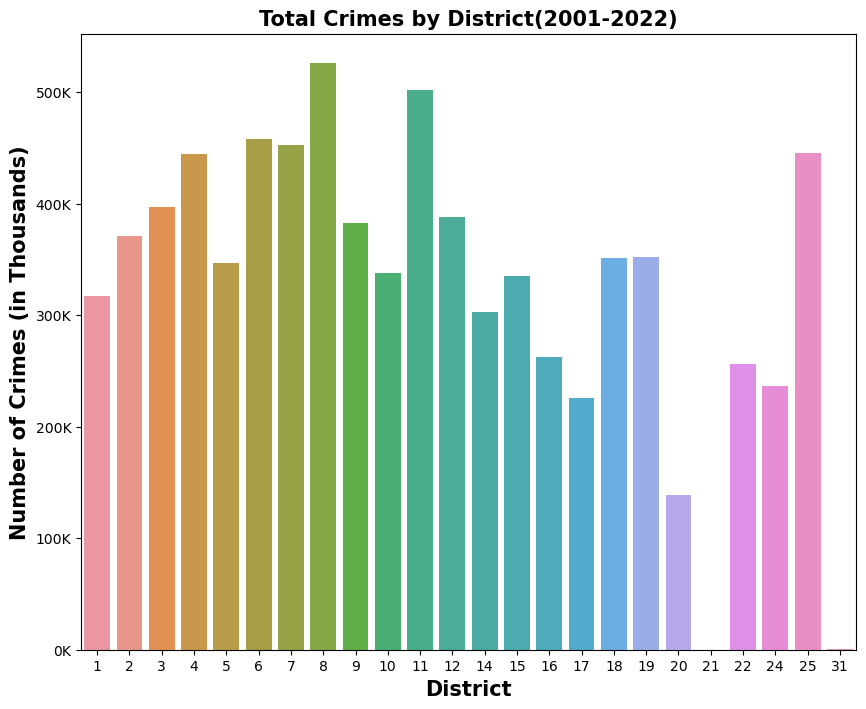

In [15]:
district_info = chicago_crime['District'].value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = district_info.index, y = district_info.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

ax.set_title('Total Crimes by District(2001-2022)', fontsize = 15, weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', fontsize = 15, weight = 'bold')
ax.set_xlabel('District', fontsize = 15, weight = 'bold');

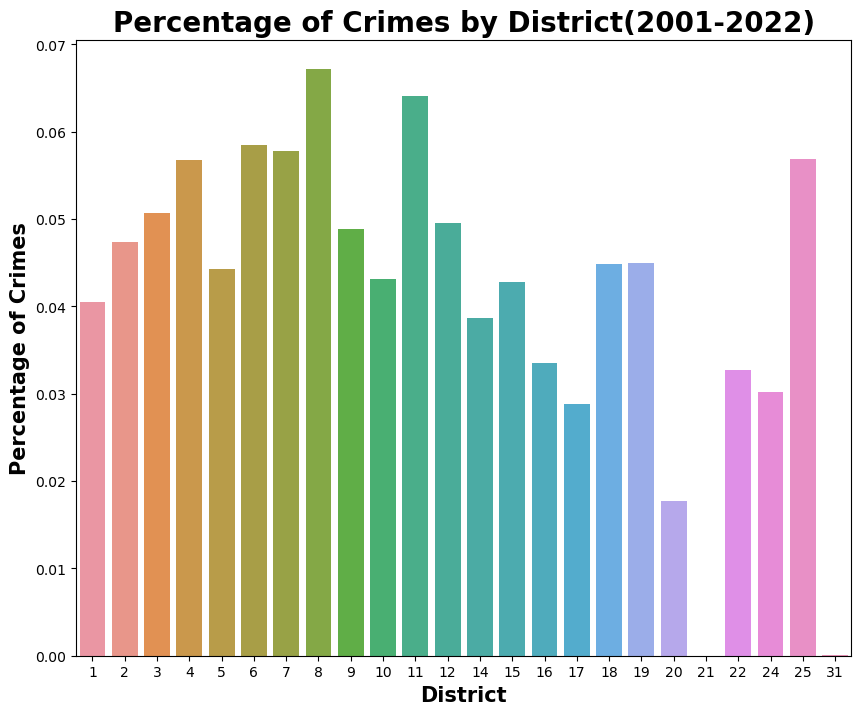

In [16]:
district_info = chicago_crime['District'].value_counts(dropna = True, normalize = True)

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = district_info.index, y = district_info.values)

ax.set_title('Percentage of Crimes by District(2001-2022)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Percentage of Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('District', fontsize = 15, weight = 'bold');

### Analysis

Which district has the most crimes? Which has the least?
- **District 8** has the **most** crimes with **526293 total crimes**. This represents **6.72%** of the total crimes reported.
- **District 21** has the **least** crimes with **4** total crimes. This represents **0.0001%** of the total crimes reported.

## 2a. Are the total number of yearly crimes increasing or decreasing? 

In [17]:
yearly_crime = chicago_crime.resample('Y').size()

yearly_crime

Date
2001-12-31    485885
2002-12-31    486804
2003-12-31    475983
2004-12-31    469421
2005-12-31    453772
2006-12-31    448177
2007-12-31    437087
2008-12-31    427169
2009-12-31    392824
2010-12-31    370501
2011-12-31    351971
2012-12-31    336273
2013-12-31    307474
2014-12-31    275740
2015-12-31    264773
2016-12-31    269805
2017-12-31    269091
2018-12-31    268802
2019-12-31    261284
2020-12-31    212160
2021-12-31    208689
2022-12-31    238652
2023-12-31    122006
Freq: A-DEC, dtype: int64

### Visualization

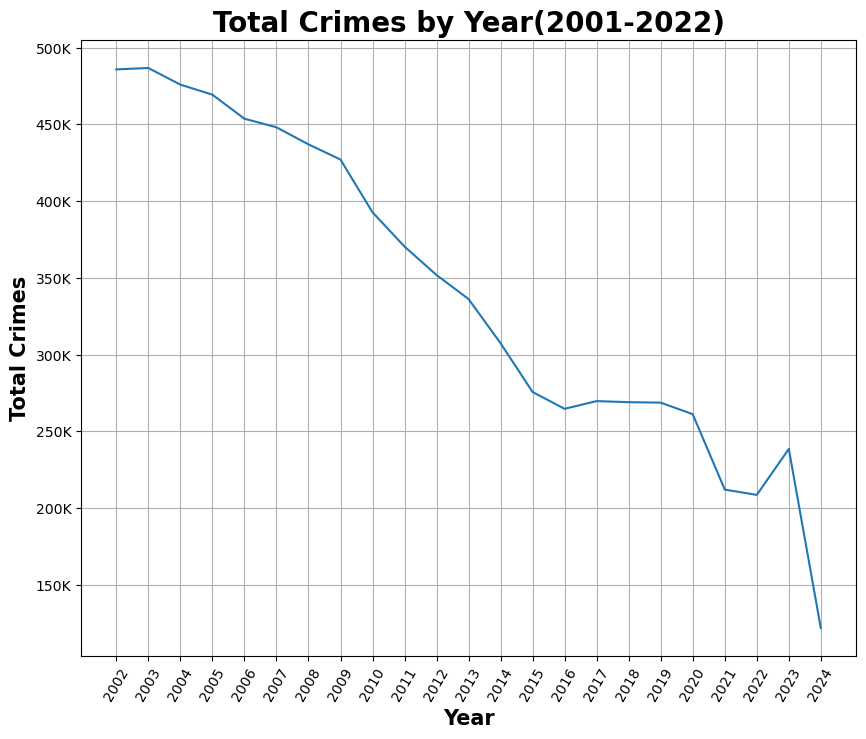

In [18]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.lineplot(x = yearly_crime.index, y = yearly_crime.values)

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

major_ticks_loc = mdates.YearLocator(1)
major_ticks_format = mdates.DateFormatter('%Y')
x_years = pd.date_range(start = '2002', end = '2024', freq = 'AS')
plt.xticks(x_years, [year.year for year in x_years])

plt.xticks(rotation = 60)
ax.grid()

ax.set_title('Total Crimes by Year(2001-2022)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

### Analysis

Are the total number of yearly crimes increasing or decreasing? 
- Crime rate over the years has been **Decreasing**

## 2b. Are there any individual crimes that are trending the opposite way? 

In [19]:
chicago_crime['Primary Type'].value_counts()

THEFT                                1652945
BATTERY                              1431628
CRIMINAL DAMAGE                       892943
NARCOTICS                             748535
ASSAULT                               511701
OTHER OFFENSE                         486497
BURGLARY                              425772
MOTOR VEHICLE THEFT                   380917
DECEPTIVE PRACTICE                    348302
ROBBERY                               294085
CRIMINAL TRESPASS                     215155
WEAPONS VIOLATION                     108151
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56134
PUBLIC PEACE VIOLATION                 52505
SEX OFFENSE                            30950
CRIM SEXUAL ASSAULT                    27609
INTERFERENCE WITH PUBLIC OFFICER       18488
LIQUOR LAW VIOLATION                   14943
GAMBLING                               14620
ARSON                                  13363
HOMICIDE                               12692
KIDNAPPING

- I need to clean up the column headers `CRIM SEXUAL ASSAULT`,`OTHER NARCOTIC VIOLATION`, `NON - CRIMINAL`, and `NON-CRIMINAL (SUBJECT SPECIFIED)`.

In [20]:
chicago_crime['Primary Type'] = chicago_crime['Primary Type'].replace(
    {'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',                                                 
     'NON - CRIMINAL': 'NON-CRIMINAL',                                                     
     'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',                                                 
     'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

chicago_crime['Primary Type'].value_counts()

THEFT                                1652945
BATTERY                              1431628
CRIMINAL DAMAGE                       892943
NARCOTICS                             748684
ASSAULT                               511701
OTHER OFFENSE                         486497
BURGLARY                              425772
MOTOR VEHICLE THEFT                   380917
DECEPTIVE PRACTICE                    348302
ROBBERY                               294085
CRIMINAL TRESPASS                     215155
WEAPONS VIOLATION                     108151
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56134
PUBLIC PEACE VIOLATION                 52505
CRIMINAL SEXUAL ASSAULT                34653
SEX OFFENSE                            30950
INTERFERENCE WITH PUBLIC OFFICER       18488
LIQUOR LAW VIOLATION                   14943
GAMBLING                               14620
ARSON                                  13363
HOMICIDE                               12692
KIDNAPPING

In [21]:
specific_crimes = chicago_crime.copy()
specific_crimes['Count'] = 1

specific_crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7834343 entries, 2001-01-01 13:00:00 to 2023-06-28 00:51:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              Int64  
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
 11  Count                 int64  
dtypes: Int64(1), bool(2), float64(3), int64(3), object(3)
memory usage: 679.9+ MB


In [22]:
specific_crimes = specific_crimes.groupby('Primary Type').resample('Y').count()

drop_these = ['ID', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
              'Longitude', 'Primary Type', 'Description', 'Location Description']
specific_crimes.drop(columns = drop_these, inplace = True)

specific_crimes

Count
Primary Type      Date             
ARSON             2001-12-31   1011
                  2002-12-31   1032
                  2003-12-31    955
                  2004-12-31    778
                  2005-12-31    691
...                             ...
WEAPONS VIOLATION 2019-12-31   6339
                  2020-12-31   8432
                  2021-12-31   8980
                  2022-12-31   8766
                  2023-12-31   4246

[700 rows x 1 columns]

In [23]:
crime_unstacked = specific_crimes.unstack(level = 0)

crime_unstacked

Count                             \
Primary Type   ARSON  ASSAULT  BATTERY BURGLARY   
Date                                              
2001-12-31    1011.0  31384.0  93460.0  26014.0   
2002-12-31    1032.0  31523.0  94153.0  25623.0   
2003-12-31     955.0  29477.0  88380.0  25157.0   
2004-12-31     778.0  28850.0  87136.0  24564.0   
2005-12-31     691.0  27067.0  83964.0  25503.0   
2006-12-31     726.0  25945.0  80666.0  24324.0   
2007-12-31     712.0  26313.0  79593.0  24858.0   
2008-12-31     644.0  25449.0  75926.0  26218.0   
2009-12-31     616.0  22861.0  68460.0  26767.0   
2010-12-31     522.0  21537.0  65402.0  26422.0   
2011-12-31     504.0  20411.0  60459.0  26620.0   
2012-12-31     469.0  19900.0  59134.0  22845.0   
2013-12-31     364.0  17972.0  54006.0  17895.0   
2014-12-31     397.0  16903.0  49452.0  14569.0   
2015-12-31     453.0  17048.0  48923.0  13184.0   
2016-12-31     516.0  18742.0  50299.0  14289.0   
2017-12-31     444.0  19306.0  49239.0  13001.0   
2018-12-31     373.0  20406.0  49828.0  11746.0   
2019-12-31     376.0  20620.0  49518.0   9638.0   
2020-12-31     588.0  18254.0  41512.0   8757.0   
2021-12-31     529.0  20342.0  40459.0   6659.0   
2022-12-31     422.0  20788.0  40896.0   7592.0   
2023-12-31     241.0  10603.0  20763.0   3527.0   

                                                                \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
Date                                                             
2001-12-31                                 1.0         55858.0   
2002-12-31                                 0.0         55941.0   
2003-12-31                                 0.0         55011.0   
2004-12-31                                 0.0         53164.0   
2005-12-31                                 0.0         54548.0   
2006-12-31                                 0.0         57124.0   
2007-12-31                                 0.0         53749.0   
2008-12-31                                 0.0         52842.0   
2009-12-31                                 0.0         47725.0   
2010-12-31                                 0.0         40653.0   
2011-12-31                                 0.0         37332.0   
2012-12-31                                 0.0         35855.0   
2013-12-31                                 0.0         30855.0   
2014-12-31                                15.0         27798.0   
2015-12-31                                34.0         28676.0   
2016-12-31                                36.0         31018.0   
2017-12-31                                69.0         29045.0   
2018-12-31                               149.0         27824.0   
2019-12-31                               217.0         26681.0   
2020-12-31                               148.0         24878.0   
2021-12-31                               173.0         25094.0   
2022-12-31                               177.0         27238.0   
2023-12-31                                91.0         14034.0   

                                                                           \
Primary Type CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS DECEPTIVE PRACTICE   
Date                                                                        
2001-12-31                    1808.0           13241.0            14948.0   
2002-12-31                    1834.0           13880.0            13731.0   
2003-12-31                    1612.0           14807.0            13459.0   
2004-12-31                    1579.0           15913.0            13255.0   
2005-12-31                    1558.0           16655.0            13590.0   
2006-12-31                    1486.0           14505.0            13606.0   
2007-12-31                    1560.0           13699.0            14170.0   
2008-12-31                    1558.0           12310.0            14931.0   
2009-12-31                    1443.0           10851.0            13876.0   
2010-12-31                    1390.0           

### Visualization

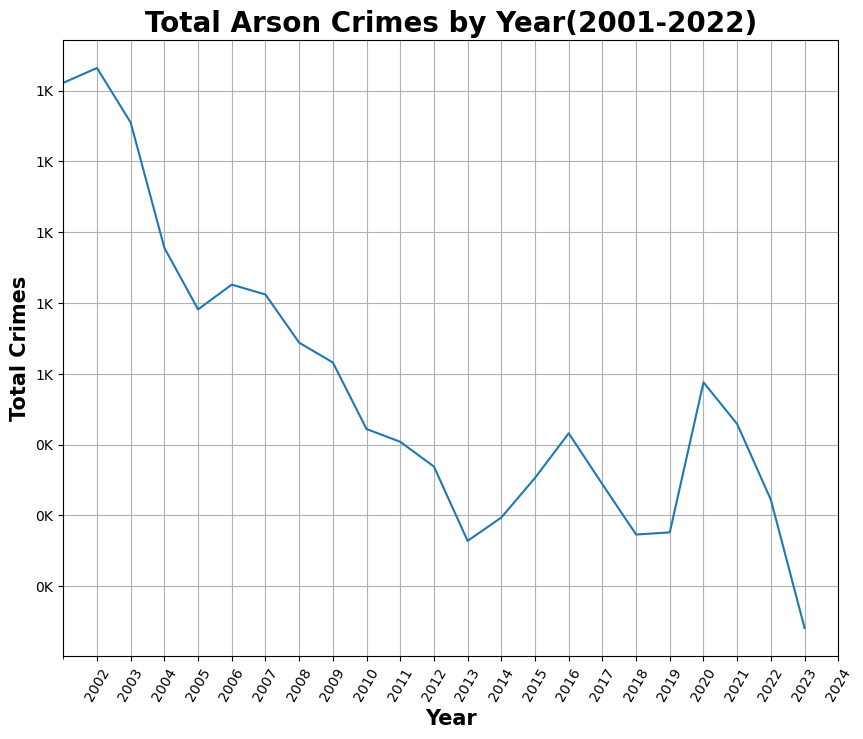

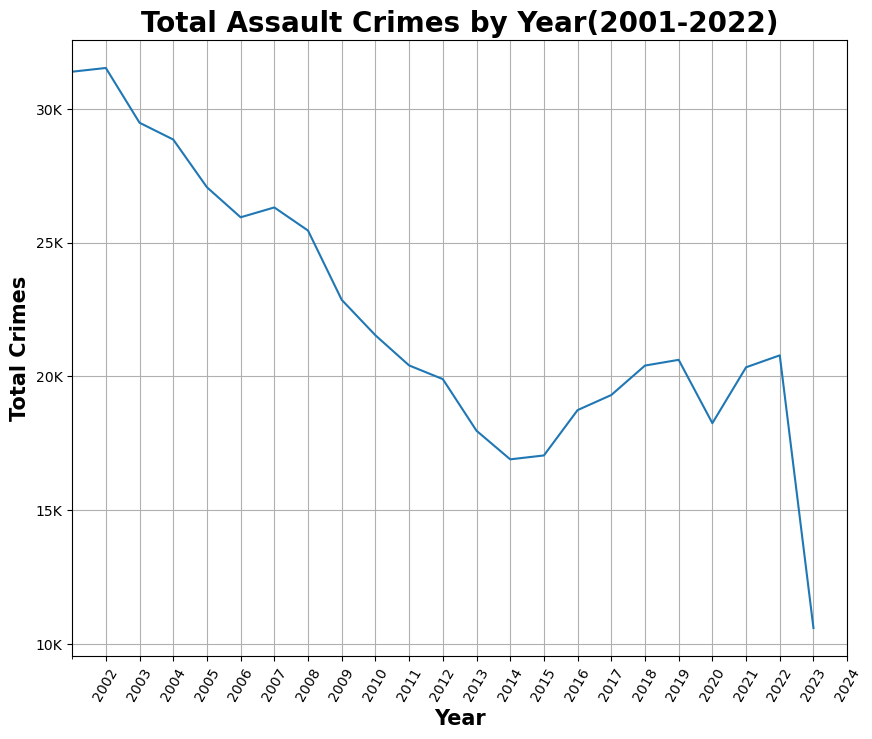

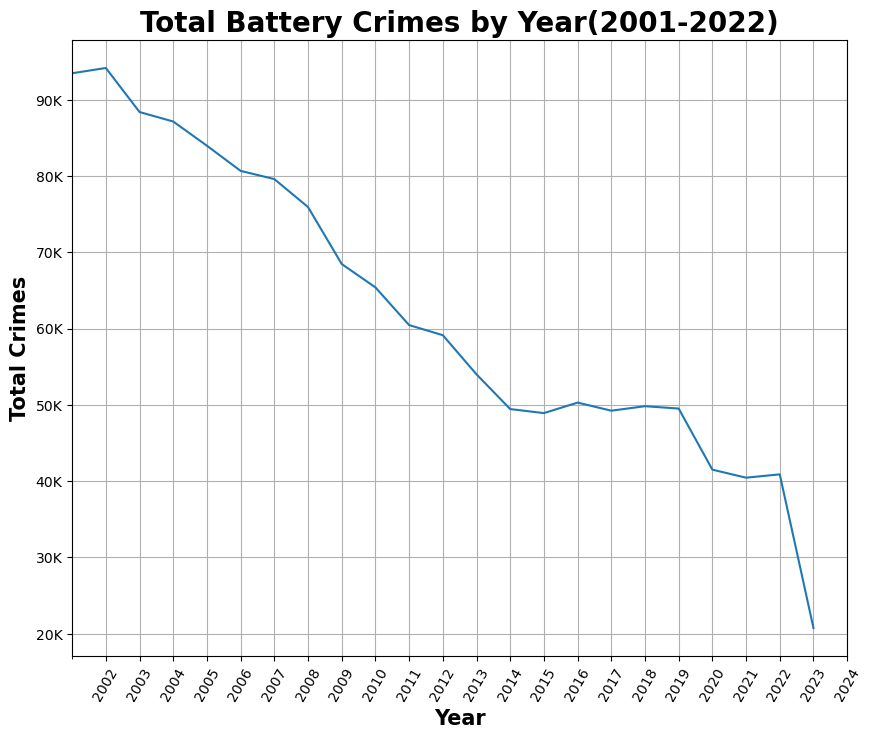

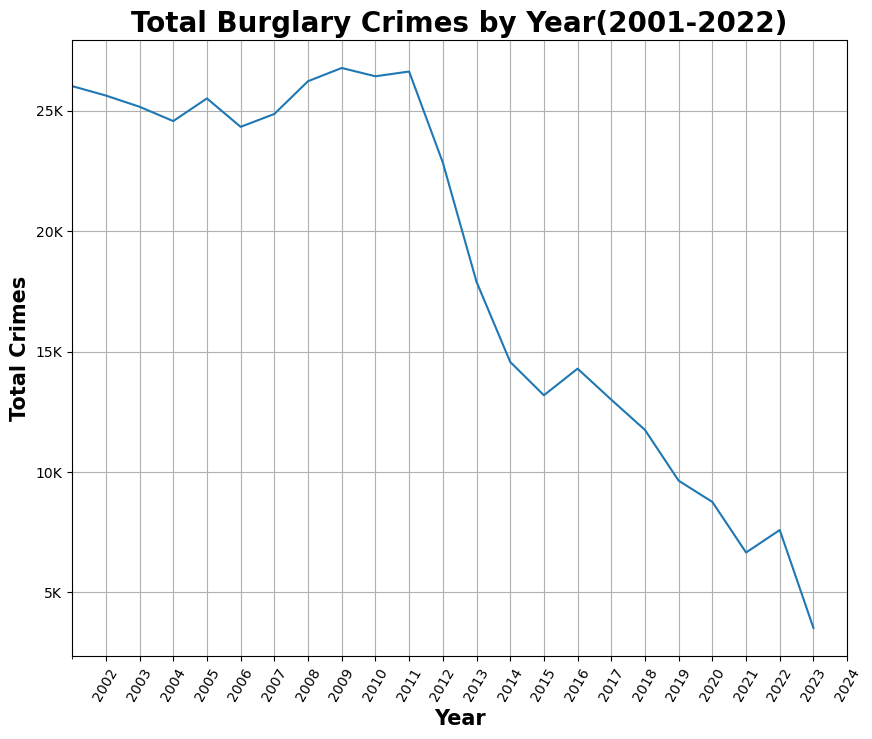

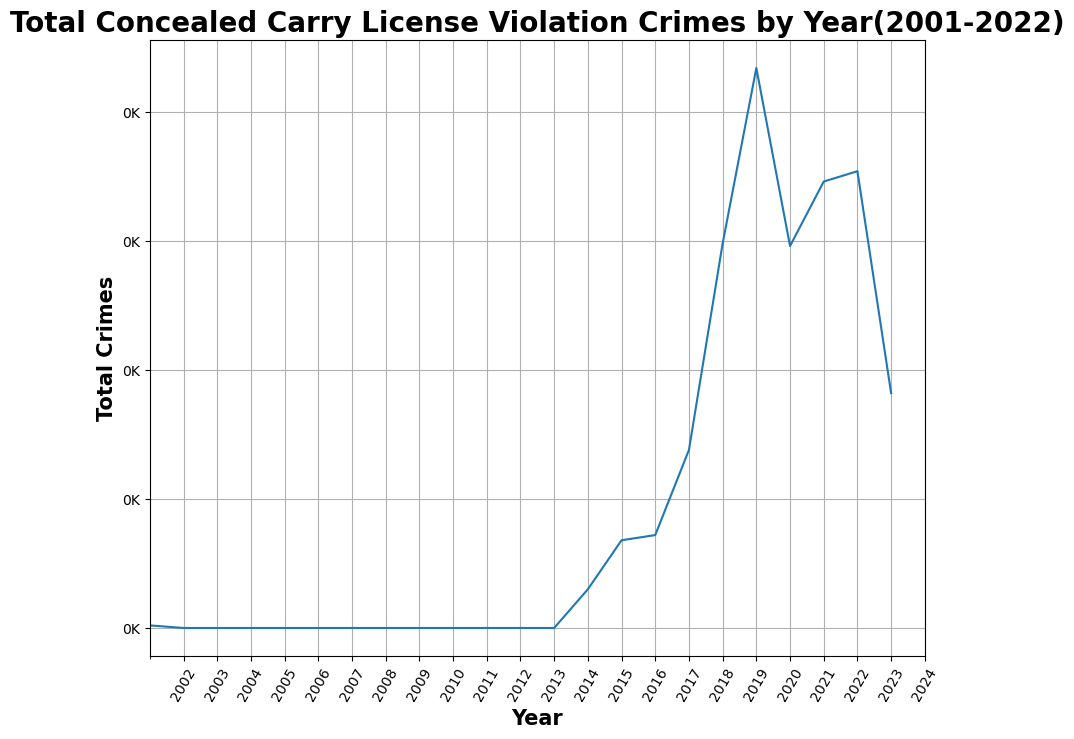

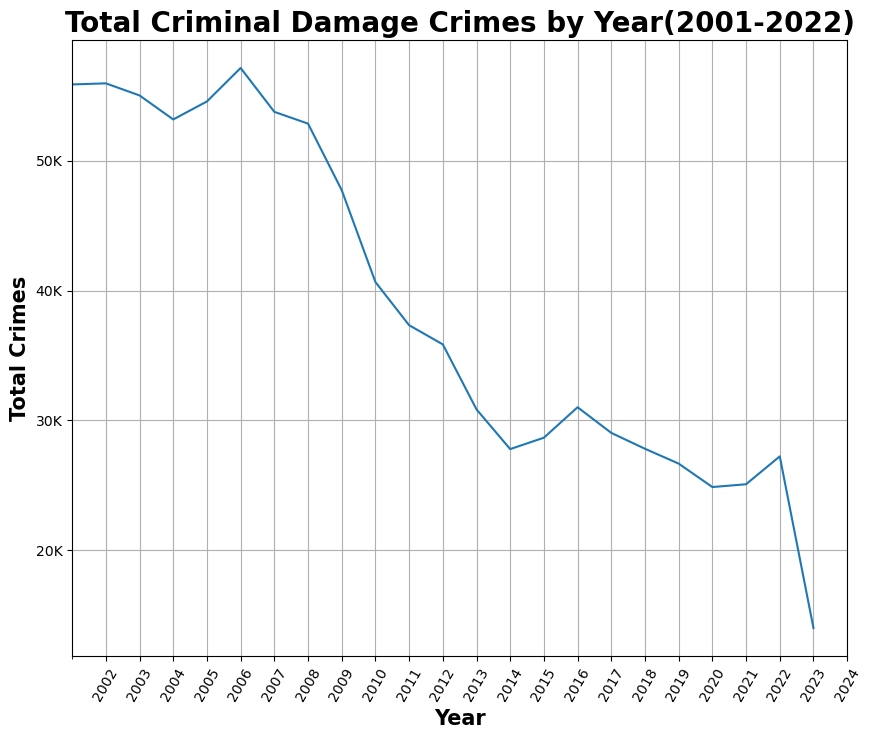

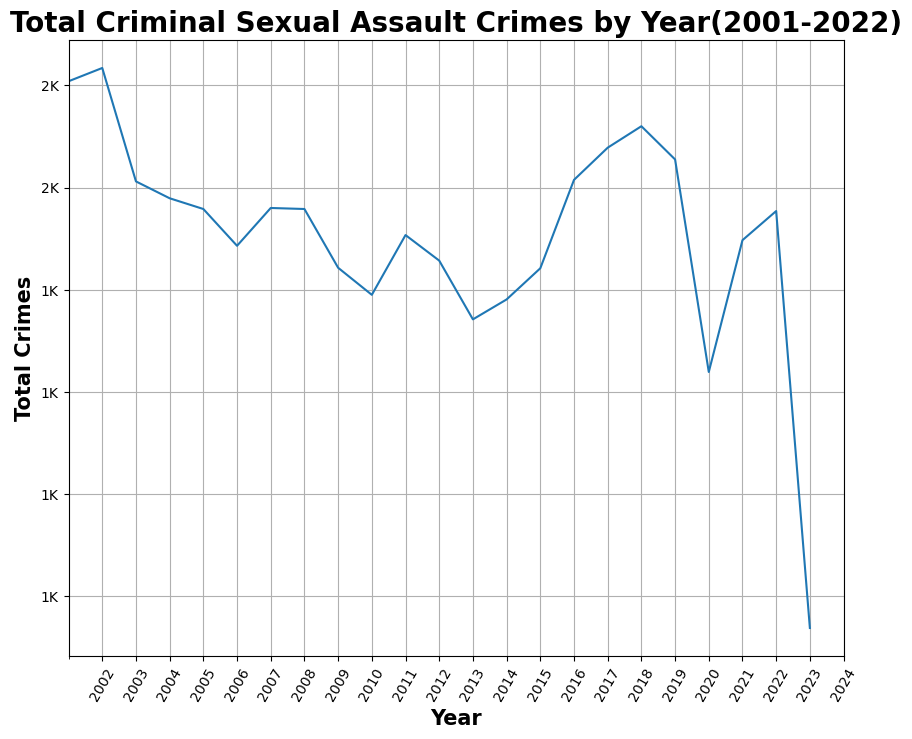

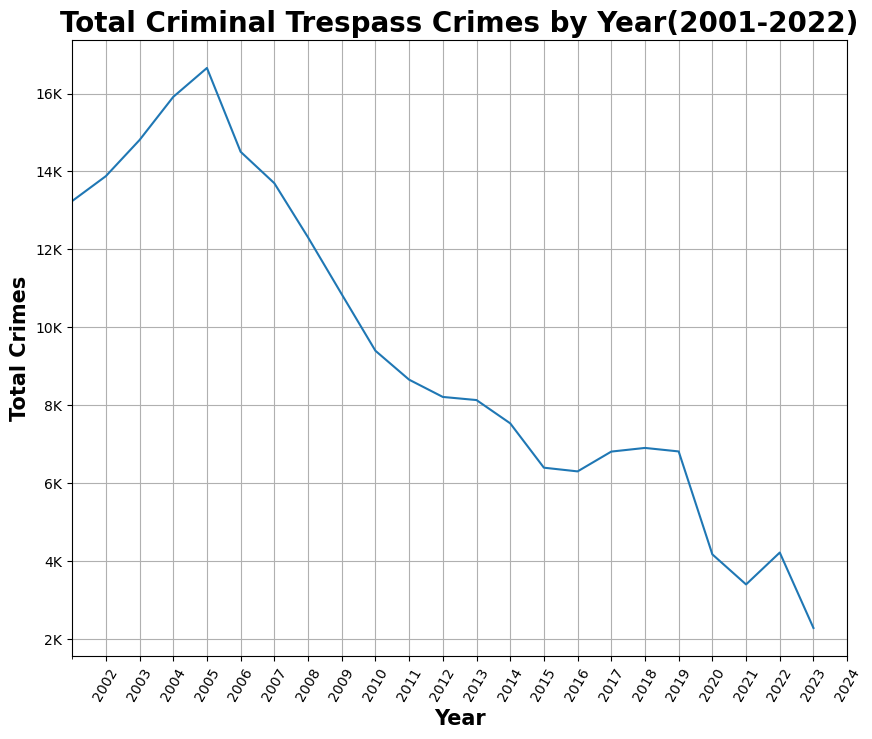

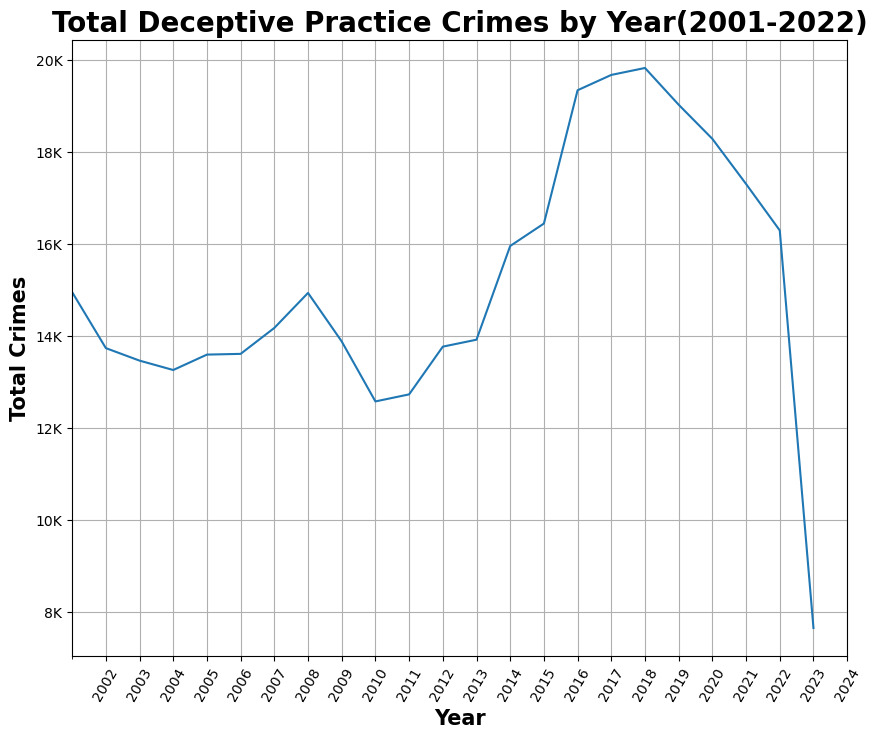

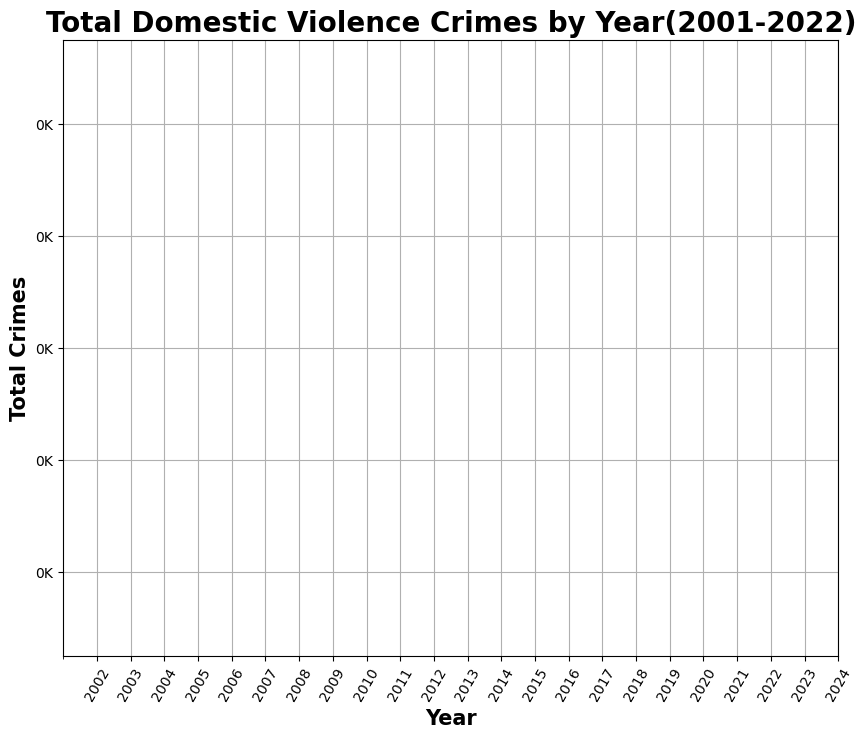

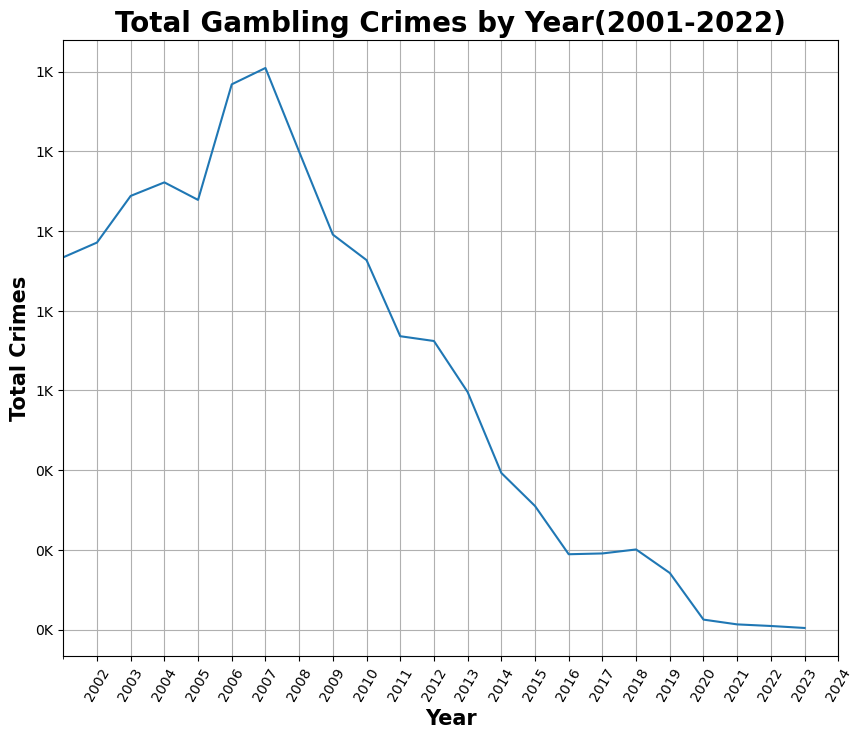

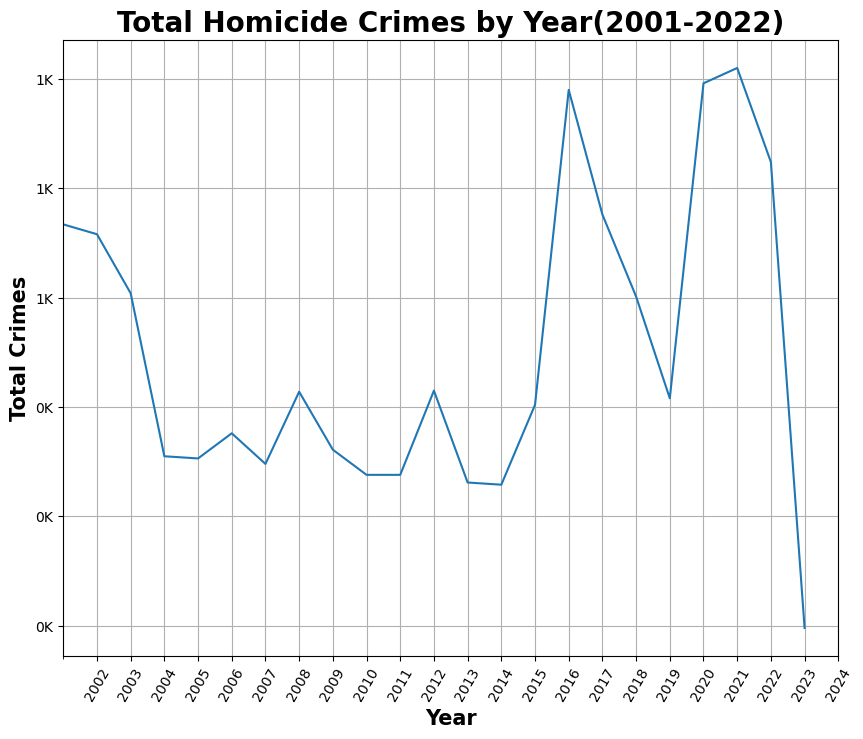

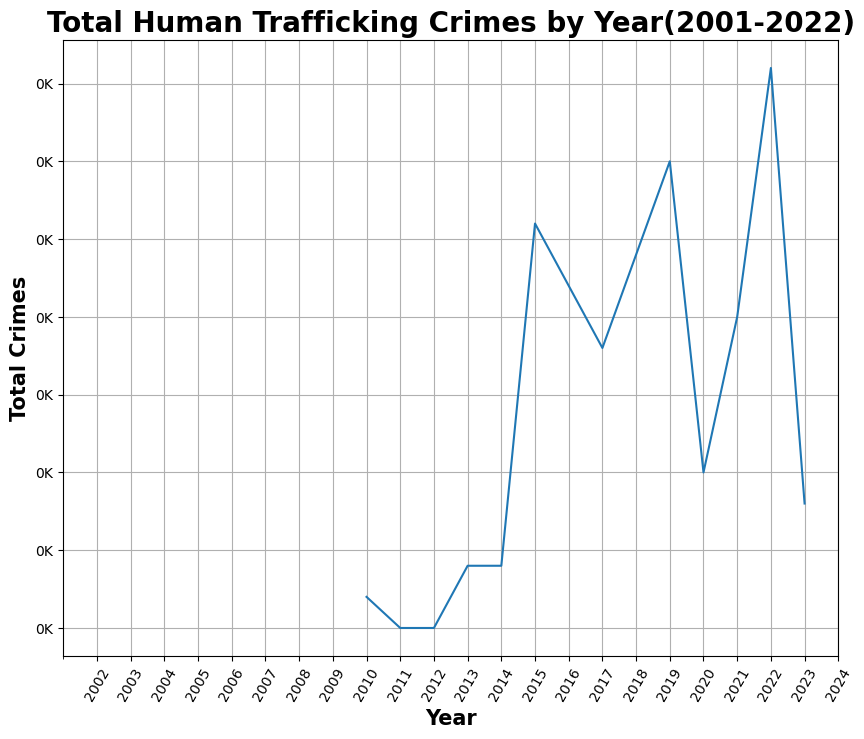

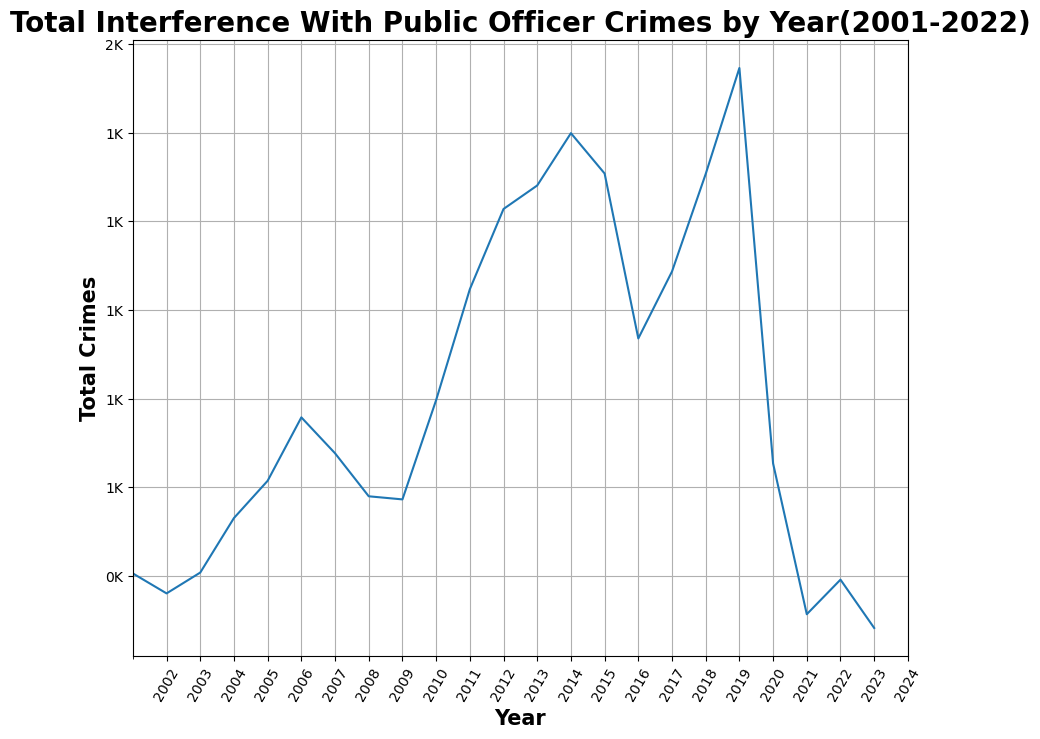

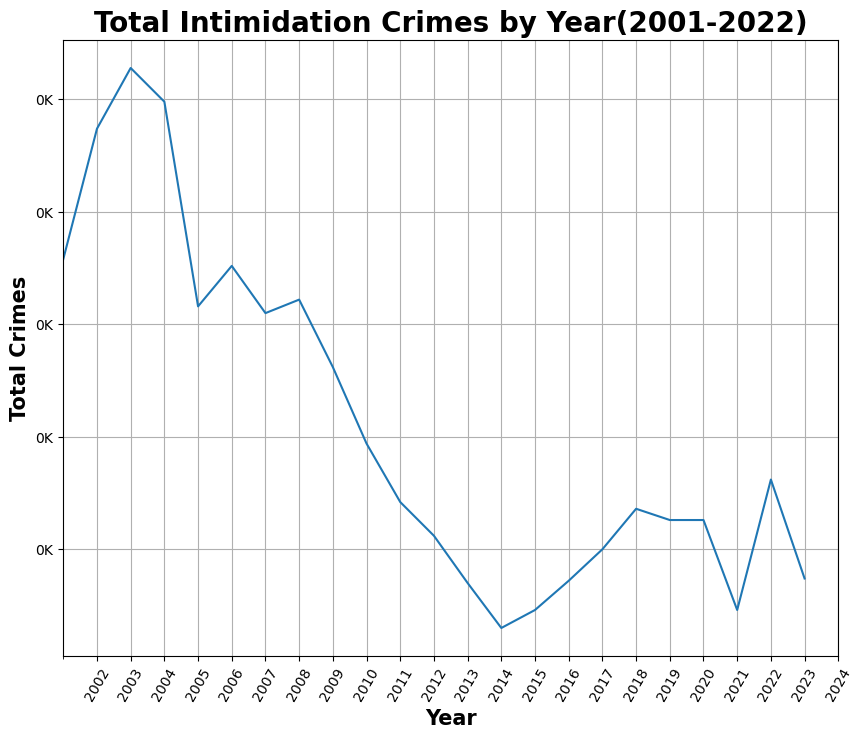

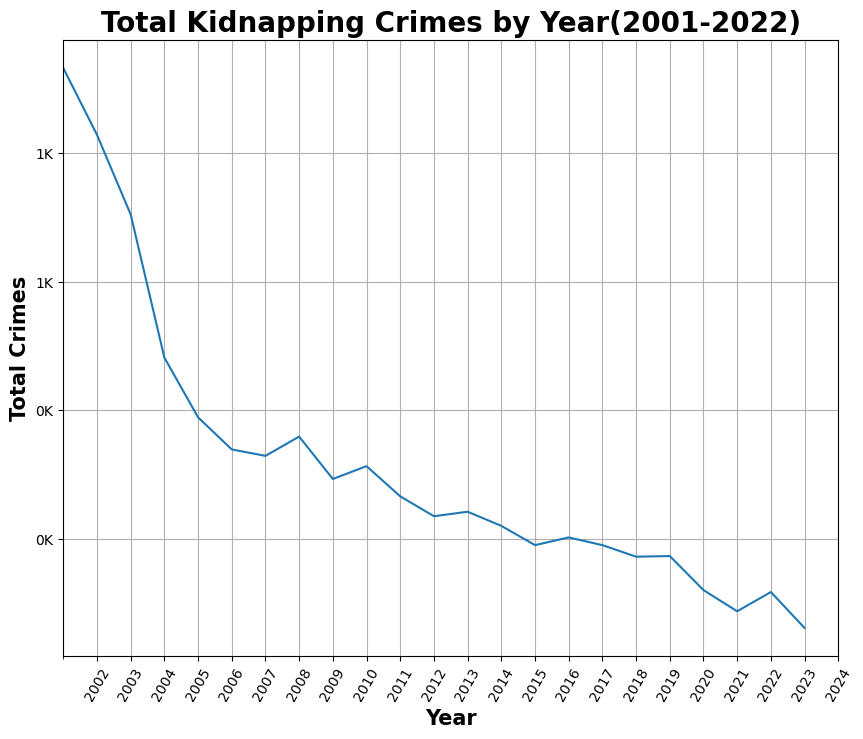

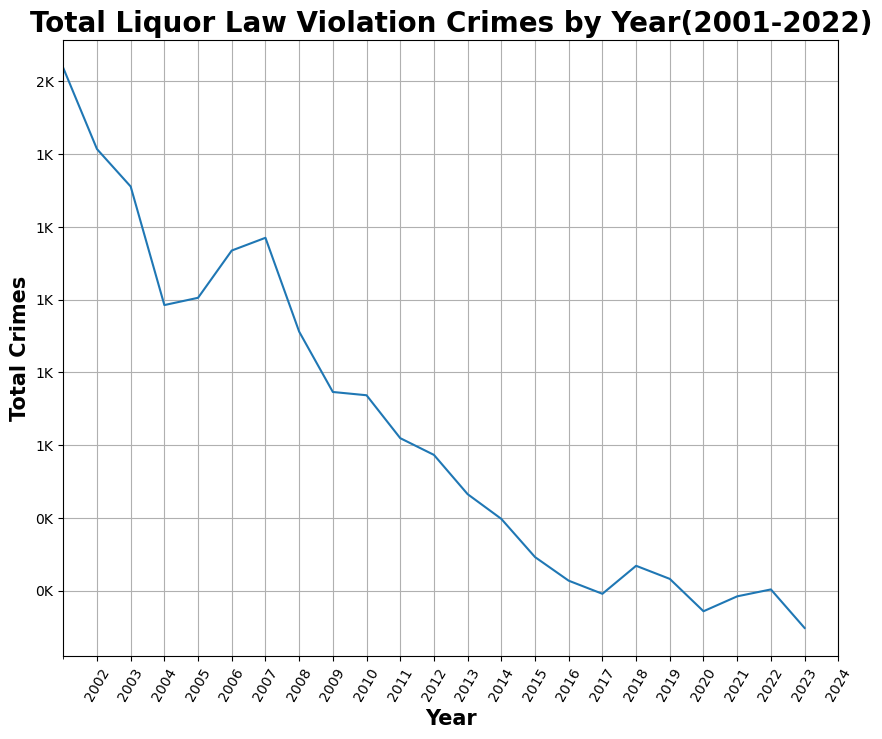

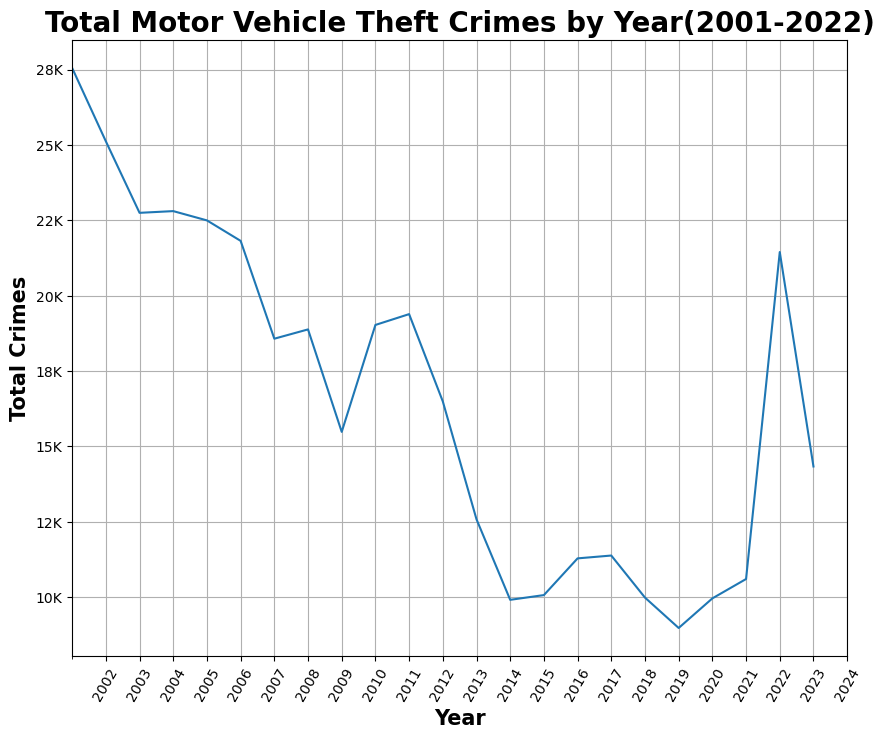

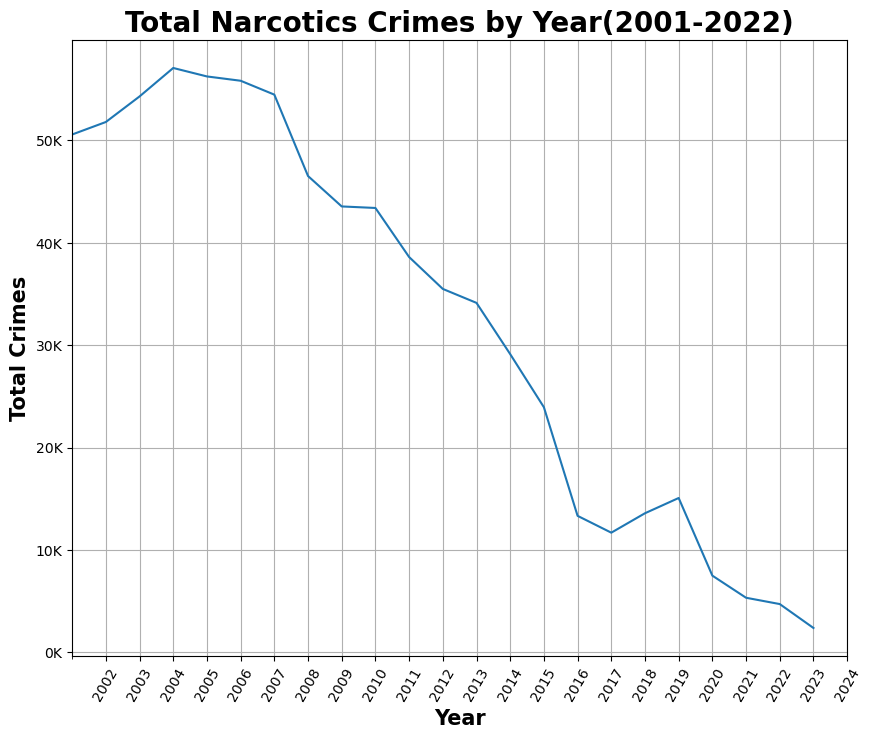

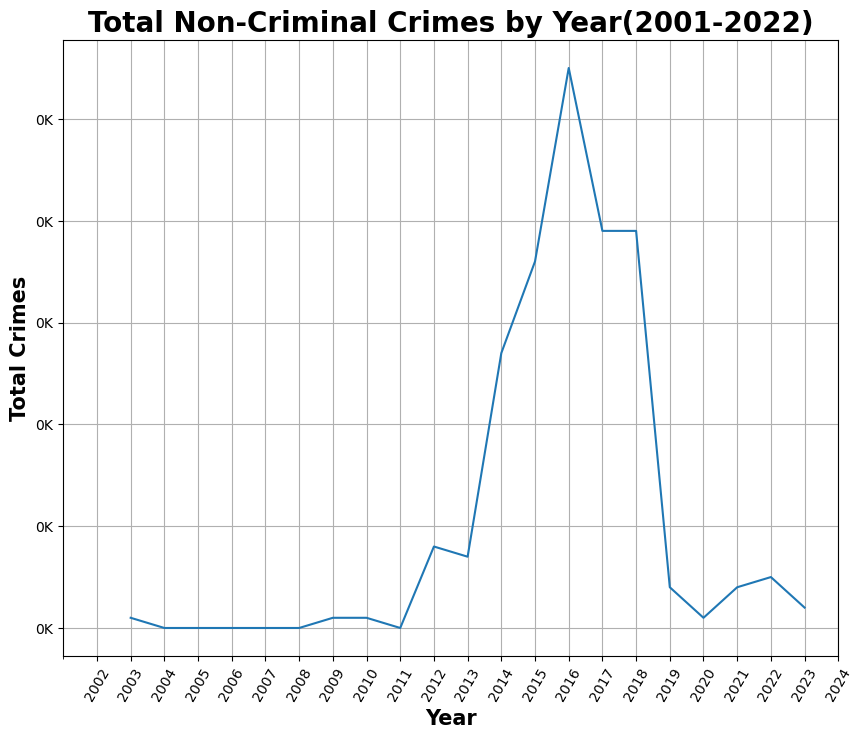

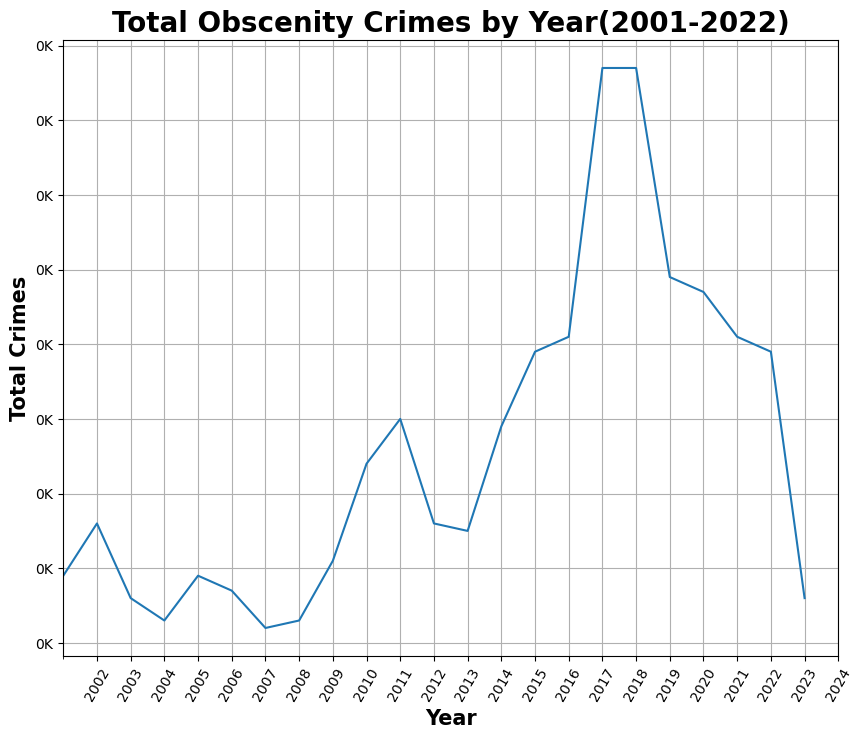

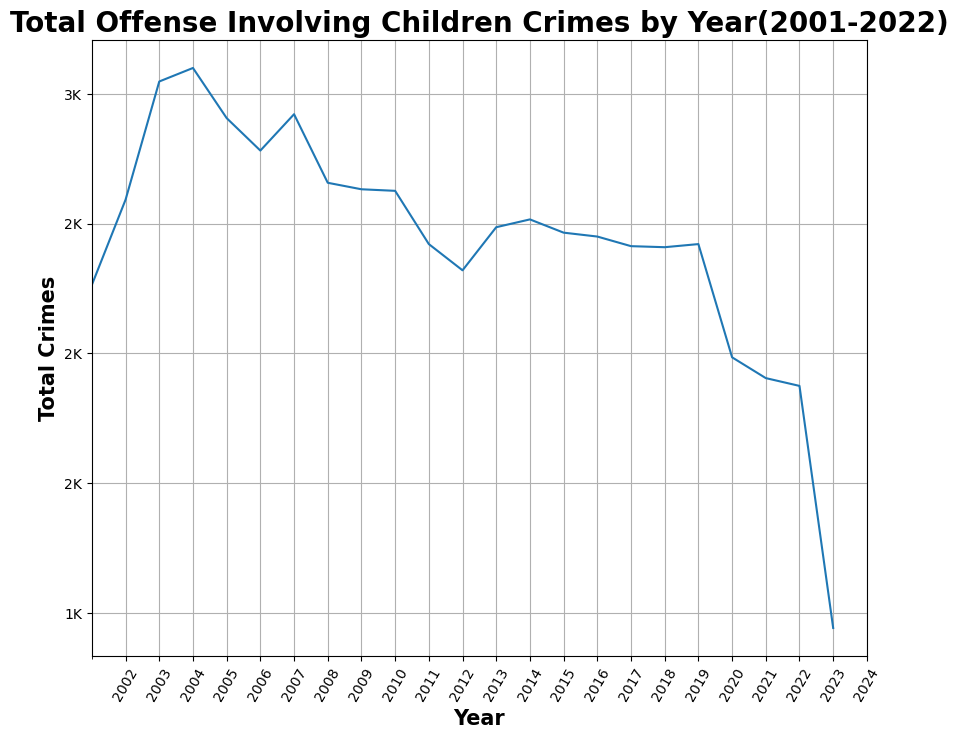

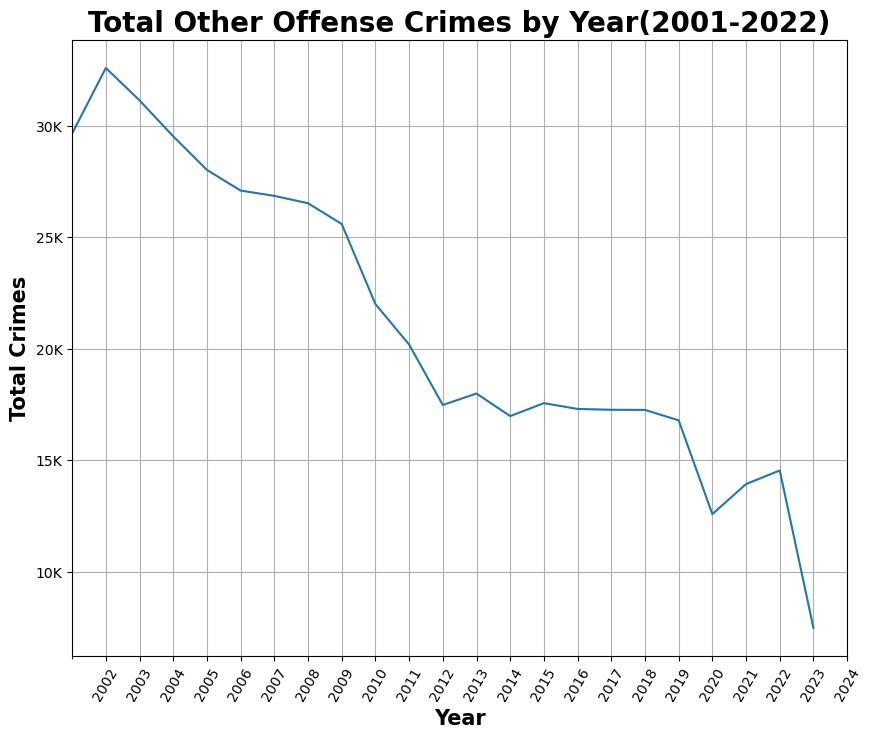

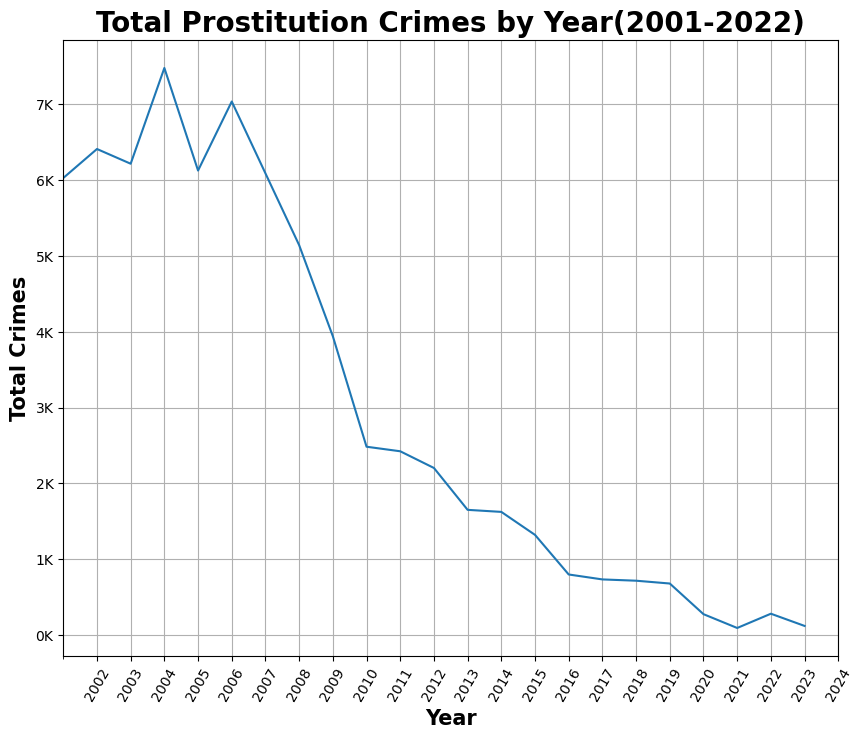

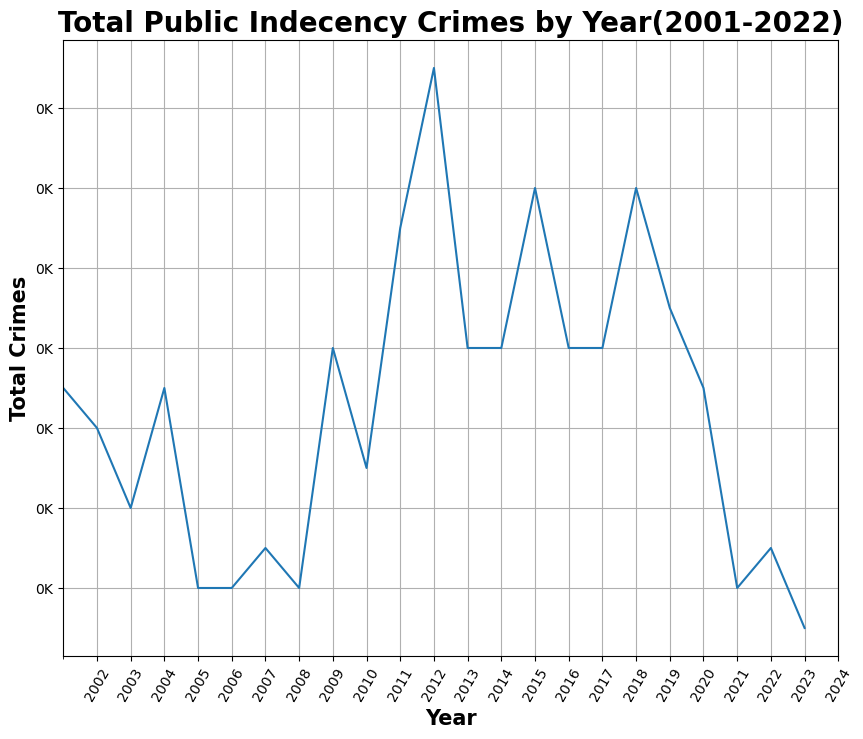

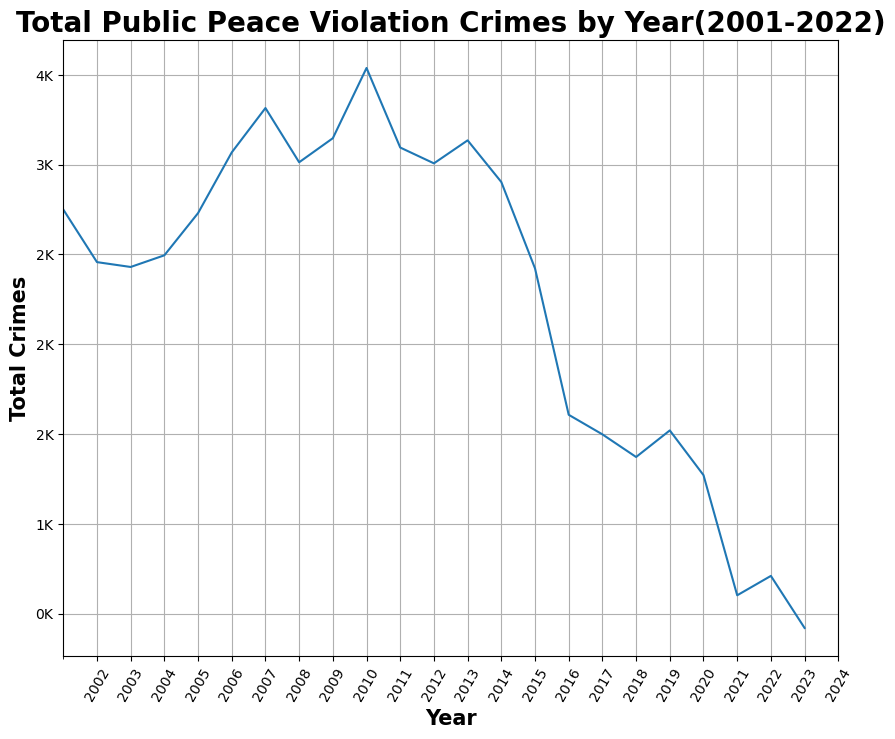

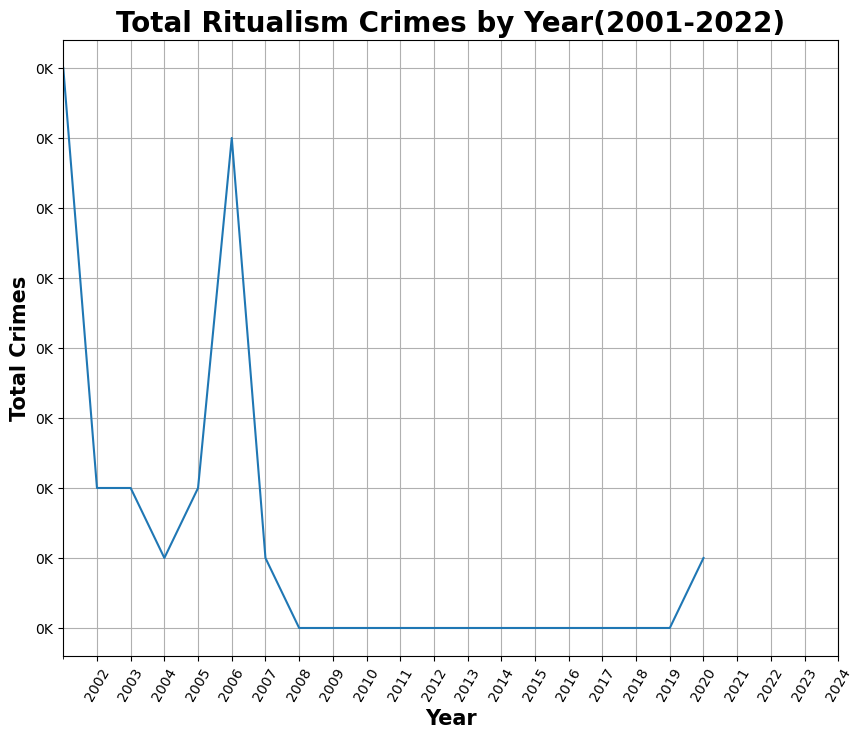

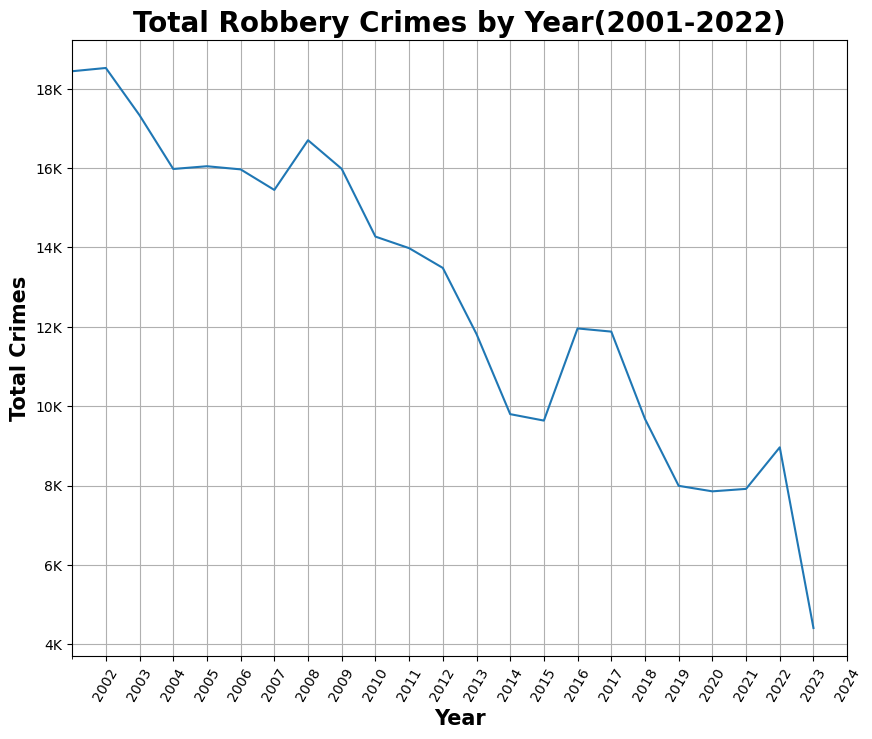

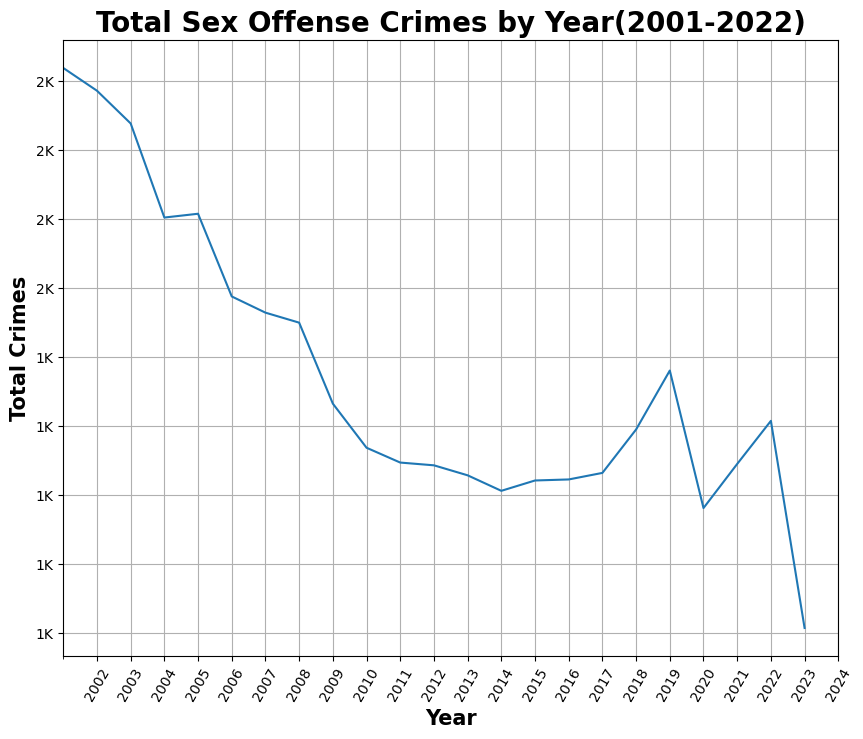

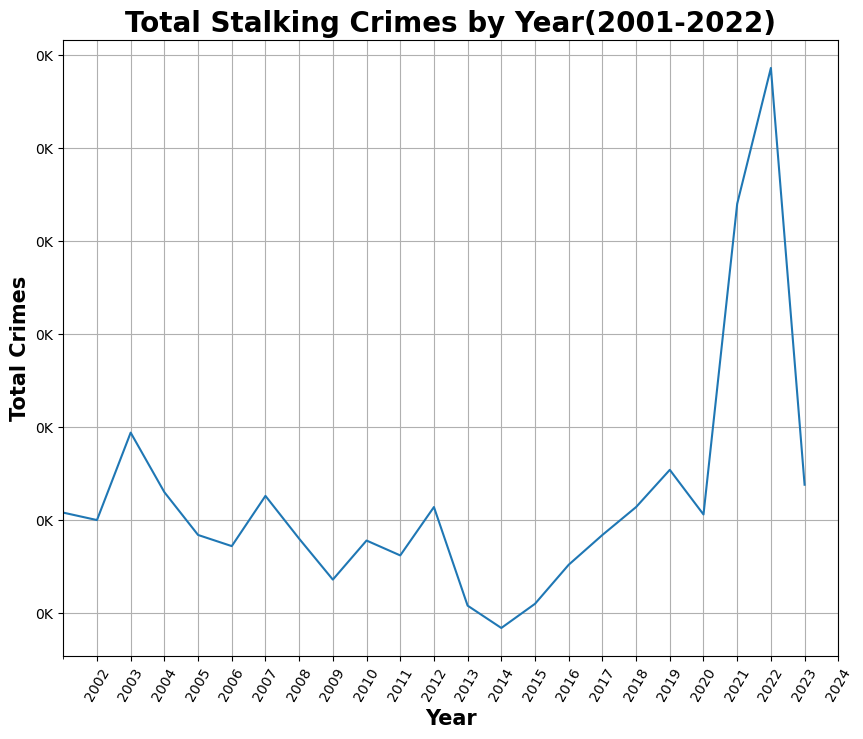

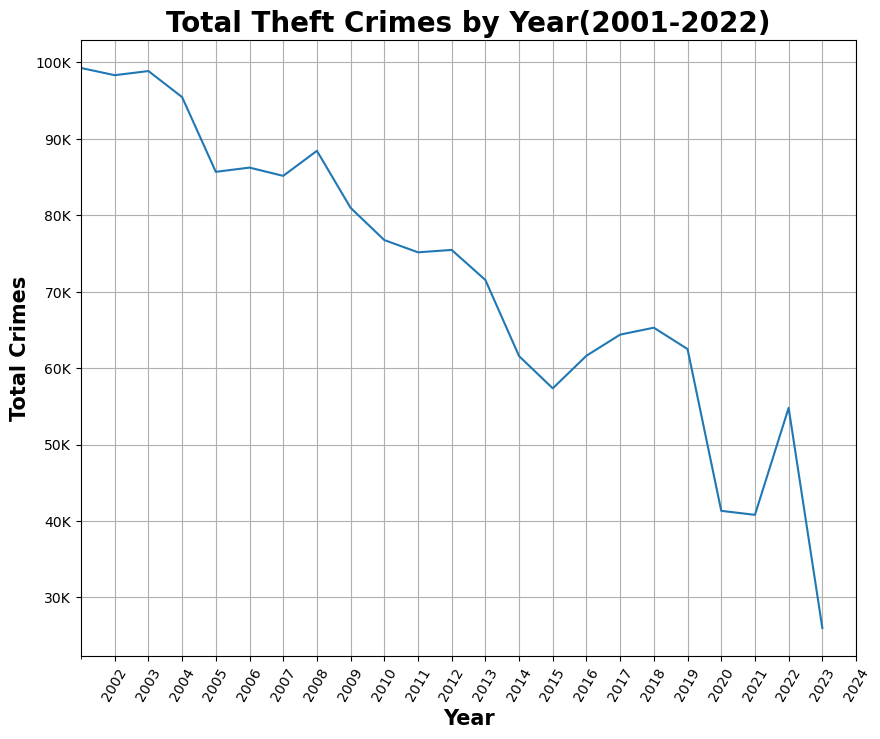

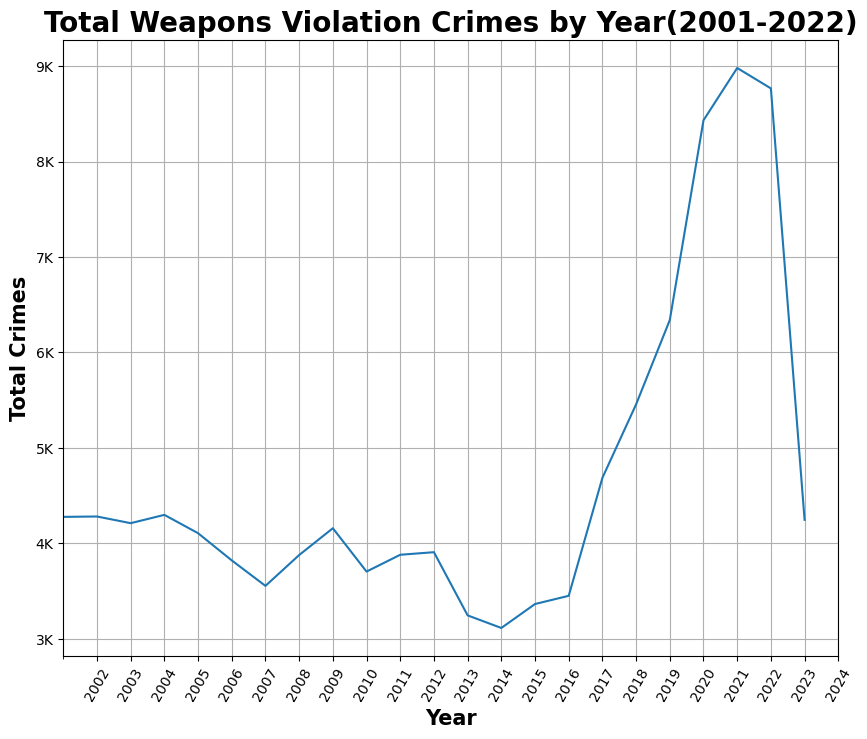

In [24]:
for i, column in enumerate(crime_unstacked.columns):
    fig, ax = plt.subplots(figsize = (10, 8))
    crime_unstacked[column].plot(ax = ax)

    fmt_thous = mticks.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(fmt_thous)

    major_ticks_loc = mdates.YearLocator(1)
    major_ticks_format = mdates.DateFormatter('%Y')
    x_years = pd.date_range(start = '2002', end = '2024', freq = 'AS')
    plt.xticks(x_years, [year.year for year in x_years])

    plt.xticks(rotation = 60)
    ax.grid()

    ax.set_title(f'Total {column[1].title()} Crimes by Year(2001-2022)', fontsize = 20, weight = 'bold')
    ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
    ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

### Analysis

- The following crime categories are trending different from the overall crime statistics:
  - CONCEALED CARRY LICENSE VIOLATION: Consistently low until 2013 and then peaked in 2019. Has been consistently high the last few years
  - CRIMINAL SEXUAL ASSAULT: Consistent throughout the years
  - DECEPTIVE PRACTICE: Consistent until 2014 then peaked in 2018 but now on the decline
  - DOMESTIC VIOLENCE: Basically nonexistent. Not enough into to determine a trend
  - HOMICIDE: Consistent until 2015 then had a huge increase in 2016. Decreased in 2017, but now is at its peak in 2022
  - HUMAN TRAFFICKING: Consistently on the rise since 2012
  - INTERFERENCE WITH PUBLIC OFFICER: Increased consistently until 2019, then had a sharp decline
  - MOTOR VEHICLE THEFT: Following the trend and decreasing until 2021 but had an uptick in 2022
  - NON-CRIMINAL: Consistent until 2011 then increased until its peak in 2016. Now back down to pre-2011 levels
  - OBSCENITY: Consistent until 2014 then had a increase until its peak in 2017 and 2018 now it is on the decline
  - PUBLIC INDECENCY: Overall low but had a swell from 2011 - 2020
  - PUBLIC PEACE VIOLATION: Had an increase from 2001 - 2010, but has been consistently decreasing since then
  - RITUALISM: Had a spike in 2006 but overall has been very low
  - STALKING: Consistently low until about 2020 then more than doubles in 2021
  - WEAPONS VIOLATION: consistent from  from 2001 to 2016, then had a very steep increase since then. More than double annually

## 3a. Which months have the most crime? Which have the least?

In [25]:
monthly = df.copy()
monthly['Month'] = monthly['Date'].dt.month_name()

monthly['Month'].nunique()

12

In [26]:
monthly['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [27]:
months = monthly['Month'].value_counts(dropna = False)

months

July         717168
August       710369
May          704628
June         701854
October      676214
September    668183
March        650142
April        647566
January      622043
November     608903
December     579679
February     547594
Name: Month, dtype: int64

### Visualization

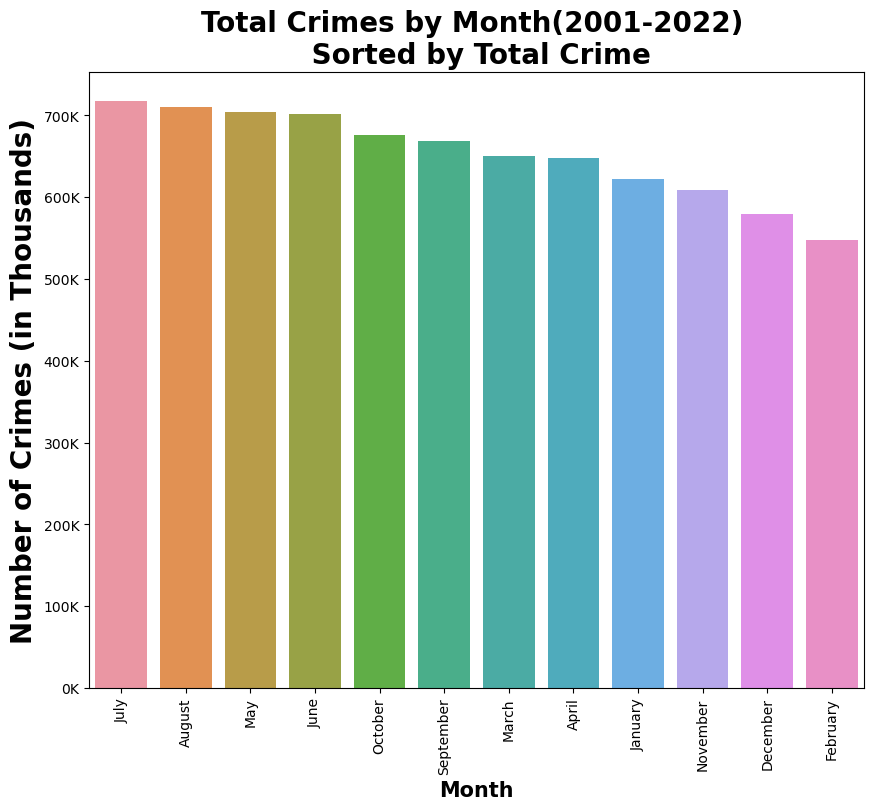

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = months.index, y = months.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Crimes by Month(2001-2022) \n Sorted by Total Crime', fontsize = 20, weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', fontsize = 20, weight = 'bold')
ax.set_xlabel('Month', fontsize = 15, weight = 'bold')

# rotate x-ticks
plt.xticks(rotation = 90);

In [29]:
month_order = ['January','February','March','April','May','June','July',
               'August','September','October','November','December']

months_in_order = months.reindex(month_order)

months_in_order

January      622043
February     547594
March        650142
April        647566
May          704628
June         701854
July         717168
August       710369
September    668183
October      676214
November     608903
December     579679
Name: Month, dtype: int64

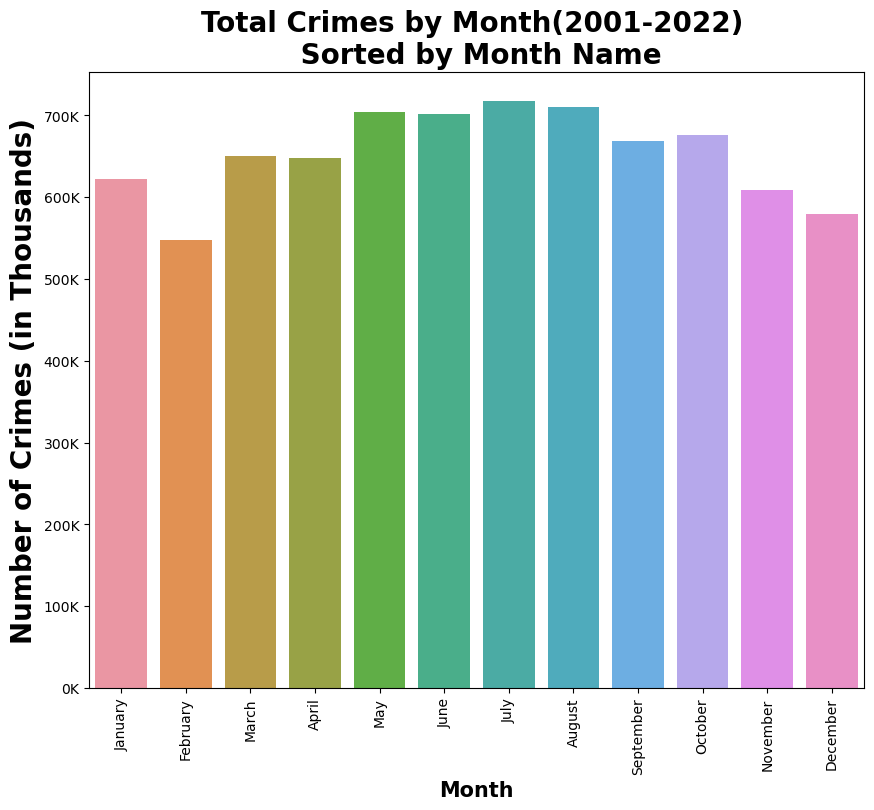

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = months_in_order.index, y = months_in_order.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

# set title and axes
ax.set_title('Total Crimes by Month(2001-2022) \n Sorted by Month Name', fontsize = 20, weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', fontsize = 20, weight = 'bold')
ax.set_xlabel('Month', fontsize = 15, weight = 'bold')

# rotate x-ticks
plt.xticks(rotation = 90);

### Analysis

Which months have the most crime? Which have the least?
- **July** has the **most** crimes committed with **717168** total crimes. **August** has the second highest crimes committed with **710369** total crimes.

- **February** has the **least** crimes committed with **547594** total crimes. **December** has the second lowest crimes committed with **579679** total crimes.     

## 3b. Are there any individual crimes that do not follow this pattern?

In [31]:
monthly['Primary Type'].value_counts()

THEFT                                1652945
BATTERY                              1431628
CRIMINAL DAMAGE                       892943
NARCOTICS                             748535
ASSAULT                               511701
OTHER OFFENSE                         486497
BURGLARY                              425772
MOTOR VEHICLE THEFT                   380917
DECEPTIVE PRACTICE                    348302
ROBBERY                               294085
CRIMINAL TRESPASS                     215155
WEAPONS VIOLATION                     108151
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56134
PUBLIC PEACE VIOLATION                 52505
SEX OFFENSE                            30950
CRIM SEXUAL ASSAULT                    27609
INTERFERENCE WITH PUBLIC OFFICER       18488
LIQUOR LAW VIOLATION                   14943
GAMBLING                               14620
ARSON                                  13363
HOMICIDE                               12692
KIDNAPPING

In [32]:
monthly['Primary Type'] = monthly['Primary Type'].replace(
    {'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT',                                                 
     'NON - CRIMINAL': 'NON-CRIMINAL',                                                     
     'NON-CRIMINAL (SUBJECT SPECIFIED)': 'NON-CRIMINAL',                                                 
     'OTHER NARCOTIC VIOLATION': 'NARCOTICS'})

monthly['Primary Type'].value_counts()

THEFT                                1652945
BATTERY                              1431628
CRIMINAL DAMAGE                       892943
NARCOTICS                             748684
ASSAULT                               511701
OTHER OFFENSE                         486497
BURGLARY                              425772
MOTOR VEHICLE THEFT                   380917
DECEPTIVE PRACTICE                    348302
ROBBERY                               294085
CRIMINAL TRESPASS                     215155
WEAPONS VIOLATION                     108151
PROSTITUTION                           69872
OFFENSE INVOLVING CHILDREN             56134
PUBLIC PEACE VIOLATION                 52505
CRIMINAL SEXUAL ASSAULT                34653
SEX OFFENSE                            30950
INTERFERENCE WITH PUBLIC OFFICER       18488
LIQUOR LAW VIOLATION                   14943
GAMBLING                               14620
ARSON                                  13363
HOMICIDE                               12692
KIDNAPPING

In [33]:
monthly_crime = monthly.groupby(['Primary Type', 'Month']).size()

monthly_crime

Primary Type       Month    
ARSON              April         1134
                   August        1182
                   December       923
                   February       840
                   January        963
                                ...  
WEAPONS VIOLATION  March         8801
                   May          10759
                   November      7952
                   October       9190
                   September     9435
Length: 372, dtype: int64

In [34]:
unstacked_monthly_crime = monthly_crime.unstack(level = 0)

unstacked_monthly_crime

Primary Type   ARSON  ASSAULT   BATTERY  BURGLARY  \
Month                                               
April         1134.0  43838.0  122100.0   31965.0   
August        1182.0  46455.0  128732.0   40596.0   
December       923.0  34322.0   98363.0   35635.0   
February       840.0  34907.0   96649.0   26192.0   
January        963.0  36519.0  104465.0   33316.0   
July          1350.0  47900.0  136814.0   39279.0   
June          1281.0  49100.0  139507.0   36500.0   
March         1140.0  43465.0  121269.0   30640.0   
May           1282.0  50458.0  139622.0   36673.0   
November      1019.0  36387.0  102960.0   37037.0   
October       1118.0  42923.0  118808.0   39550.0   
September     1131.0  45427.0  122339.0   38389.0   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIMINAL DAMAGE  \
Month                                                              
April                                      90.0          77529.0   
August                                     96.0          81709.0   
December                                   64.0          63129.0   
February                                   83.0          57363.0   
January                                    82.0          64961.0   
July                                       95.0          83395.0   
June                                      111.0          81307.0   
March                                      94.0          74192.0   
May                                       105.0          82262.0   
November                                   73.0          71565.0   
October                                    99.0          80060.0   
September                                 118.0          75471.0   

Primary Type  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  DECEPTIVE PRACTICE  \
Month                                                                          
April                          2694.0            18098.0             29039.0   
August                         3182.0            18564.0             29169.0   
December                       2324.0            15803.0             29990.0   
February                       2439.0            17061.0             26671.0   
January                        3231.0            18856.0             31619.0   
July                           3279.0            18029.0             28520.0   
June                           3228.0            17823.0             29188.0   
March                          2730.0            19174.0             30077.0   
May                            3084.0            18768.0             28744.0   
November                       2540.0            16735.0             27921.0   
October                        2918.0            18330.0             29457.0   
September                      3004.0            17914.0             27907.0   

Primary Type  DOMESTIC VIOLENCE  ...  OTHER OFFENSE  PROSTITUTION  \
Month                            ...                                
April                       NaN  ...        42835.0        6039.0   
August                      NaN  ...        41074.0        6284.0   
December                    NaN  ...        35097.0        4352.0   
February                    NaN  ...        39772.0        5674.0   
January                     1.0  ...        43413.0        6446.0   
July                        NaN  ...        41532.0        5875.0   
June                        NaN  ...        41847.0        5601.0   
March                       NaN  ...        44629.0        6148.0   
May                         NaN  ...        43402.0        6094.0   
November                    NaN  ...        36318.0        5557.0   
October                     NaN  ...        39419.0        5925.0   
September                   NaN  ...        37159.0        5877.0   

Primary Type  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  RITUALISM  ROBBERY  \
Month                                                                        
April                     13.0                  4423.0      

In [35]:
unstacked_monthly_crime = unstacked_monthly_crime.astype('Int64')

unstacked_monthly_crime.isna().sum()

Primary Type
ARSON                                 0
ASSAULT                               0
BATTERY                               0
BURGLARY                              0
CONCEALED CARRY LICENSE VIOLATION     0
CRIMINAL DAMAGE                       0
CRIMINAL SEXUAL ASSAULT               0
CRIMINAL TRESPASS                     0
DECEPTIVE PRACTICE                    0
DOMESTIC VIOLENCE                    11
GAMBLING                              0
HOMICIDE                              0
HUMAN TRAFFICKING                     0
INTERFERENCE WITH PUBLIC OFFICER      0
INTIMIDATION                          0
KIDNAPPING                            0
LIQUOR LAW VIOLATION                  0
MOTOR VEHICLE THEFT                   0
NARCOTICS                             0
NON-CRIMINAL                          0
OBSCENITY                             0
OFFENSE INVOLVING CHILDREN            0
OTHER OFFENSE                         0
PROSTITUTION                          0
PUBLIC INDECENCY           

In [36]:
unstacked_monthly_crime.fillna(value = 0, inplace = True)
unstacked_monthly_crime.isna().sum()

Primary Type
ARSON                                0
ASSAULT                              0
BATTERY                              0
BURGLARY                             0
CONCEALED CARRY LICENSE VIOLATION    0
CRIMINAL DAMAGE                      0
CRIMINAL SEXUAL ASSAULT              0
CRIMINAL TRESPASS                    0
DECEPTIVE PRACTICE                   0
DOMESTIC VIOLENCE                    0
GAMBLING                             0
HOMICIDE                             0
HUMAN TRAFFICKING                    0
INTERFERENCE WITH PUBLIC OFFICER     0
INTIMIDATION                         0
KIDNAPPING                           0
LIQUOR LAW VIOLATION                 0
MOTOR VEHICLE THEFT                  0
NARCOTICS                            0
NON-CRIMINAL                         0
OBSCENITY                            0
OFFENSE INVOLVING CHILDREN           0
OTHER OFFENSE                        0
PROSTITUTION                         0
PUBLIC INDECENCY                     0
PUBLIC PEACE

### Visualization

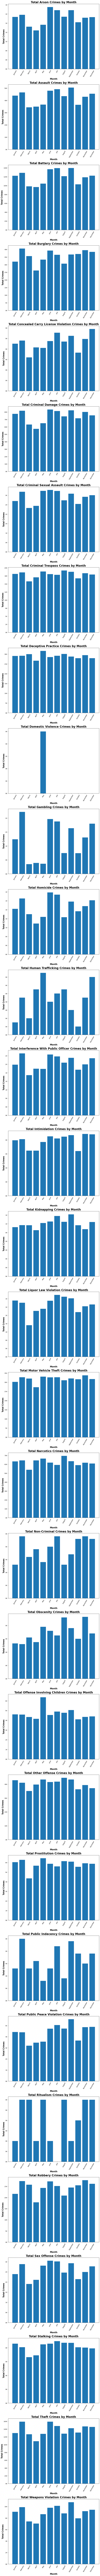

In [37]:
fig, axes = plt.subplots(len(unstacked_monthly_crime.columns),
                        figsize = (10, 8 * len(unstacked_monthly_crime.columns)))  
    

for i, column in enumerate(unstacked_monthly_crime):
  
    ax = axes[i]

    fmt_thous = mticks.FuncFormatter(thousands)
    ax.yaxis.set_major_formatter(fmt_thous)


    month_datetime = pd.to_datetime(unstacked_monthly_crime.index, format = '%B').sort_values()
    x_months = range(len(unstacked_monthly_crime))
    x_labels = [m.strftime('%B') for m in month_datetime]
    ax.set_xticks(x_months)
    ax.set_xticklabels(x_labels, rotation = 60)
    

    ax.set_title(f'Total {column.title()} Crimes by Month', fontsize = 20, weight = 'bold')
    ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
    ax.set_xlabel('Month', fontsize = 15, weight = 'bold')


    ax.bar(x_months, unstacked_monthly_crime[column])
    ax.tick_params(axis = 'x', rotation = 60)

plt.tight_layout()

### Analysis

- These crimes follow the trends that have the most offenses in warmer months(June - September) and the least in the winter(December - March):
  - ASSAULT: Most in fall (September) and the least in spring (March)
  - CRIMINAL SEXUAL ASSAULT: Most in summer (June) and the least in spring (March)
  - CRIMINAL TRESPASS: Most in summer (August) and the least in spring (March)
  - LIQUOR LAW VIOLATION: Most in summer (July) and the least in spring (March)
  - NARCOTICS: Most in summer (August) and the least in spring (March)  
  - OTHER OFFENSE: Most in summer (August) and the least in spring (March)
  - SEX OFFENSE: Most in summer (June) and the least in spring (March)
  - STALKING: Most in summer (July) and the least in spring (March)



- These crimes follow a different trend from the overall trend:
  - ARSON:  Most in summer (June) and the least in spring (April)
  - BATTERY: Most in fall (September) and the least in spring (April)
  - BURGLARY: Most in winter (February) and the least in spring (April)
  - CONCEALED CARRY LICENSE VIOLATION: Most in winter (December) and the least in spring (March)
  - CRIMINAL DAMAGE: Most in summer (June) and the least in spring (April)
  - DECEPTIVE PRACTICE: Most in spring (May) and the least in spring (April)
  - DOMESTIC VIOLENCE: The only instances tracked were in spring (May)
  - GAMBLING: Most in winter (February) and the least in spring (March)
  - HOMICIDE: Most in summer (June) and the least in spring (April)
  - HUMAN TRAFFICKING: Most in spring (May) and the least in fall (October)
  - INTERFERENCE WITH PUBLIC OFFICER: Most in winter (February) and the least in spring (March)
  - INTIMIDATION: Most in fall (November) and the least in fall (October)
  - KIDNAPPING: Most in fall (September) and the least in spring (April)
  - MOTOR VEHICLE THEFT: Most in fall (November) and the least in spring (April)
  - NON-CRIMINAL: Most in summer (July) and the least in summer (August)
  - OBSCENITY: Most in fall (November) and the least in spring (February)
  - OFFENSE INVOLVING CHILDREN: Most in Spring (May) and the least in fall (October)
  - PROSTITUTION: Most in spring (May) and the least in spring (March)
  - PUBLIC INDECENCY: Most in winter (February) and the least in spring (May)
  - PUBLIC PEACE VIOLATION: Most in fall (September) and the least in spring (March)
  - RITUALISM: Most in several months (February, March, May, August, November, December and the least in spring (July)
  - ROBBERY: Most in fall (November) and the least in spring (April)
  - THEFT: Most in winter (February) and the least in spring (April)
  - WEAPONS VIOLATION: Most in fall (September) and the least in spring (April)

- Although several crimes follow a slightly different trend, the vast majority of them increase during the warmer months and decrease during the colder ones. 